# 4.10: Coding Etiquette & Excel Reporting


###  Table of Contents:

1. Import libraries and files


2. Consider security implications


3. Compare customer behavior in different geographic areas
    - Create a regional segmentation of the data
    - Determine whether there’s a difference in spending habits across the different regions


4. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. 
    -  Excluding low-activity customers from the data and export the subset. 
    -  Excluding high-activity customers from the data and export the subset. 


5. Create customer profiling variables
    - Investigate customer age and create age category column
    - Investigate income and create income category column    
    - Investigate number of dependents and create number of dependents category column
    - Investigate hour_order_was_placed and segment customers
    - Investigate day order was placed      
        
    - Segment customers by specific departments   
       - add department names to customers dataframe
    - Customers who purchase alcohol
    - Customers who purchase baby food, etc.
    - Customers who purchase pet items
    

6. Create visualizations to show the distribution of profiles

7. Aggregate the max, mean, and min on a customer-profile level for usage frequency and expenditure
    - Age Profile
    - Customer income
    - Number of Dependents
    - Departments
    - Days since prior order by department
    - Alcohol purchasers
    - Customers with baby
    - Customers with pet(s)
    - Family Size
    - Time of order
    
    
8. Compare your customer profiles with regions and departments
    - Customer loyalty vs. regions
    - Customer loyalty vs. order frequency
    - Customer loyalty vs. customer activity
    - Customer income category vs. region and department
    - Dependents category vs. region
    - Alcohol category vs. region
    - Babies category vs. region
    - Pets category vs. region
    - Time of order vs region and department
    

9. Exporting updated dataframes and charts
    - 9.1 Exporting dataframes
    - 9.2 Exporting charts

###  1.  Import the data set you exported in Exercise 4.9 into a new Jupyter notebook. This should be the merged version of your data that contains the new customers column.

In [1]:
#  Import libraries

import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Paths to/from project folder

path_orig = r'C:\Users\kacor\CareerFoundry-Python\PROJECT - Instacart Basket Analysis\02 Data\Original Data'
path_prep = r'C:\Users\kacor\CareerFoundry-Python\PROJECT - Instacart Basket Analysis\02 Data\Prepared Data'
path_vis = r'C:\Users\kacor\CareerFoundry-Python\PROJECT - Instacart Basket Analysis\04 Analysis\Visualizations'

In [3]:
#  Import main dataset

instacart_merged = pd.read_pickle(os.path.join(path_prep, 'instacart_merged_4-9.pkl'))

In [4]:
# Set max comumns to be displayed

pd.set_option('display.max_columns', 50)

In [5]:
instacart_merged.head(0)

,order_id,user_id,order_number,orders_day_of_week,hour_order_was_placed,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,department_id,prices,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_spent,spending_flag,order_freq,order_freq_flag,first_name,last_name,gender,state,age,date_joined,number_of_dependents,family_status,income


In [6]:
instacart_merged.shape

(32404859, 30)

In [7]:
instacart_merged.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'hour_order_was_placed', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'department_id',
       'prices', 'price_range_loc', 'busiest_days', 'busiest_period_of_day',
       'max_order', 'loyalty_flag', 'avg_spent', 'spending_flag', 'order_freq',
       'order_freq_flag', 'first_name', 'last_name', 'gender', 'state', 'age',
       'date_joined', 'number_of_dependents', 'family_status', 'income'],
      dtype='object')

###  2. Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.

-  PII data will be addressed in accordance with the California Consumer Privacy Act (CCPA)
-  At this point I would recommend dropping the first_namd and last_name columns

In [8]:
# Dropping PII information 

instacart_merged = instacart_merged.drop(columns = ['first_name','last_name'])


###  3. The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.
- Use the region information in this Wikipedia article to create your column (you only need to create regions, not divisions).

- Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)

In [9]:

# Region 1 
Northeast = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']

# Region 2
Midwest = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']

# Region 3 
South = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Arkansas', 'Louisiana']

# Region 4
West = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii'] 


In [10]:
instacart_merged.loc[instacart_merged['state'].isin(Northeast), 'region'] = 'Northeast'

In [11]:
instacart_merged.loc[instacart_merged['state'].isin(Midwest), 'region'] = 'Midwest'

In [12]:
instacart_merged.loc[instacart_merged['state'].isin(South), 'region'] = 'South'

In [13]:
instacart_merged.loc[instacart_merged['state'].isin(West), 'region'] = 'West'

In [14]:
instacart_merged.head()

,order_id,user_id,order_number,orders_day_of_week,hour_order_was_placed,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,department_id,prices,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_spent,spending_flag,order_freq,order_freq_flag,gender,state,age,date_joined,number_of_dependents,family_status,income,region
0,2539329,1,1,2,8,NaN,196,1,0,Soda,7,9.0,Mid-range product,Regularly day,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423.0,South
1,2398795,1,2,3,7,15.0,196,1,1,Soda,7,9.0,Mid-range product,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423.0,South
2,473747,1,3,3,12,21.0,196,1,1,Soda,7,9.0,Mid-range product,Slowest days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423.0,South
3,2254736,1,4,4,7,29.0,196,1,1,Soda,7,9.0,Mid-range product,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423.0,South
4,431534,1,5,4,15,28.0,196,1,1,Soda,7,9.0,Mid-range product,Slowest days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423.0,South


In [15]:
instacart_merged.groupby('region')['spending_flag'].value_counts()

region     spending_flag
Midwest    Low spender       7568060
           High spender        29265
Northeast  Low spender       5704094
           High spender        18642
South      Low spender      10751306
           High spender        40579
West       Low spender       8261690
           High spender        31223
Name: spending_flag, dtype: int64

In [16]:
instacart_merged.groupby('region')['spending_flag'].value_counts(normalize=True)

region     spending_flag
Midwest    Low spender      0.996148
           High spender     0.003852
Northeast  Low spender      0.996742
           High spender     0.003258
South      Low spender      0.996240
           High spender     0.003760
West       Low spender      0.996235
           High spender     0.003765
Name: spending_flag, dtype: float64

<AxesSubplot:title={'center':'Spending Habits by Region'}, ylabel='Region'>

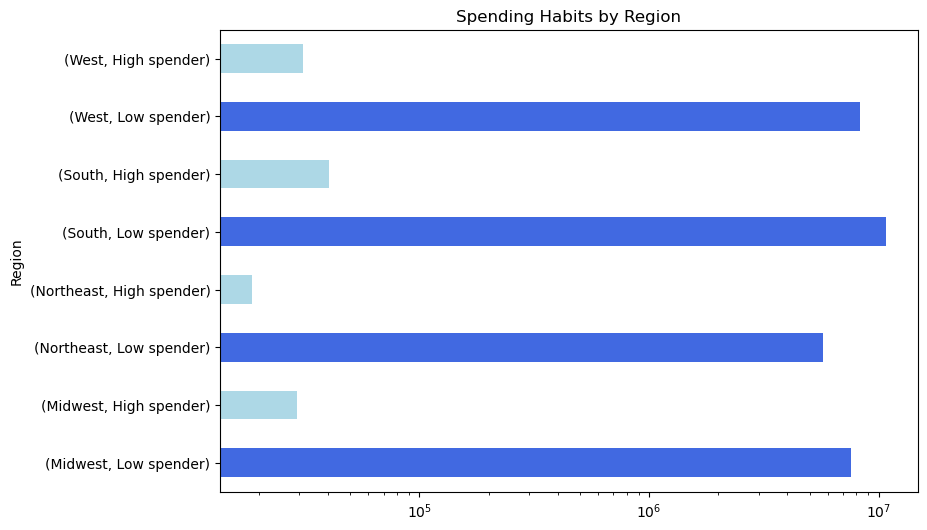

In [17]:
barh_spend_hab_region = instacart_merged.groupby('region')['spending_flag'].value_counts().plot(kind= 'barh', \
                        color = ['royalblue', 'lightblue'], title='Spending Habits by Region', xlabel='Region', \
                        ylabel='Number of Customers', logx=True, figsize=(9,6))
barh_spend_hab_region

###  The regions do have different levels of spending, with the south having the most spending and the midwest having the least. But in all four regions, approximately 2% of customers are in the "High Spender" category, while 98% are low spenders. This is consistent across the regions.

##  4.  The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [18]:
# Create activity_flag based on the number of orders

instacart_merged.loc[instacart_merged['max_order'] <5, 'activity_flag'] = 'Low activity'
instacart_merged.loc[instacart_merged['max_order'] >=5, 'activity_flag'] = 'High activity'
instacart_merged.head(10)

,order_id,user_id,order_number,orders_day_of_week,hour_order_was_placed,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,department_id,prices,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_spent,spending_flag,order_freq,order_freq_flag,gender,state,age,date_joined,number_of_dependents,family_status,income,region,activity_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,7,9.0,Mid-range product,Regularly day,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423.0,South,High activity
1,2398795,1,2,3,7,15.0,196,1,1,Soda,7,9.0,Mid-range product,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423.0,South,High activity
2,473747,1,3,3,12,21.0,196,1,1,Soda,7,9.0,Mid-range product,Slowest days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423.0,South,High activity
3,2254736,1,4,4,7,29.0,196,1,1,Soda,7,9.0,Mid-range product,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423.0,South,High activity
4,431534,1,5,4,15,28.0,196,1,1,Soda,7,9.0,Mid-range product,Slowest days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423.0,South,High activity
5,3367565,1,6,2,7,19.0,196,1,1,Soda,7,9.0,Mid-range product,Regularly day,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423.0,South,High activity
6,550135,1,7,1,9,20.0,196,1,1,Soda,7,9.0,Mid-range product,Busiest days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423.0,South,High activity
7,3108588,1,8,1,14,14.0,196,2,1,Soda,7,9.0,Mid-range product,Busiest days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423.0,South,High activity
8,2295261,1,9,1,16,0.0,196,4,1,Soda,7,9.0,Mid-range product,Busiest days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423.0,South,High activity
9,2550362,1,10,4,8,30.0,196,1,1,Soda,7,9.0,Mid-range product,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423.0,South,High activity


In [19]:
# Checking new added column

instacart_merged['activity_flag'].value_counts(dropna = False)

High activity    30964564
Low activity      1440295
Name: activity_flag, dtype: int64

In [20]:
# Create a subset which excludes low_activity customers

instacart_customers = instacart_merged[instacart_merged['activity_flag'] == 'High activity']
instacart_customers.head()

,order_id,user_id,order_number,orders_day_of_week,hour_order_was_placed,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,department_id,prices,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_spent,spending_flag,order_freq,order_freq_flag,gender,state,age,date_joined,number_of_dependents,family_status,income,region,activity_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,7,9.0,Mid-range product,Regularly day,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423.0,South,High activity
1,2398795,1,2,3,7,15.0,196,1,1,Soda,7,9.0,Mid-range product,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423.0,South,High activity
2,473747,1,3,3,12,21.0,196,1,1,Soda,7,9.0,Mid-range product,Slowest days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423.0,South,High activity
3,2254736,1,4,4,7,29.0,196,1,1,Soda,7,9.0,Mid-range product,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423.0,South,High activity
4,431534,1,5,4,15,28.0,196,1,1,Soda,7,9.0,Mid-range product,Slowest days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423.0,South,High activity


In [21]:
instacart_customers.shape

(30964564, 30)

In [22]:
# Export high_activity_customers as instacart customers 


instacart_customers.to_pickle(os.path.join(path_prep, 'instacart_customers_4-10.pkl'))

In [23]:
# Create a subset which excludes high_activity customers

low_activity_customers = instacart_merged[instacart_merged['activity_flag'] == 'Low activity']
low_activity_customers.head()

,order_id,user_id,order_number,orders_day_of_week,hour_order_was_placed,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,department_id,prices,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_spent,spending_flag,order_freq,order_freq_flag,gender,state,age,date_joined,number_of_dependents,family_status,income,region,activity_flag
1510,520620,120,1,3,11,NaN,196,2,0,Soda,7,9.0,Mid-range product,Slowest days,Most orders,3,New customer,9.385714,Low spender,19.0,Regular customer,Female,Kentucky,54,2017-03-02,2,married,99219.0,South,Low activity
1511,3273029,120,3,2,8,19.0,196,2,1,Soda,7,9.0,Mid-range product,Regularly day,Average orders,3,New customer,9.385714,Low spender,19.0,Regular customer,Female,Kentucky,54,2017-03-02,2,married,99219.0,South,Low activity
1512,520620,120,1,3,11,NaN,46149,1,0,Zero Calorie Cola,7,13.4,Mid-range product,Slowest days,Most orders,3,New customer,9.385714,Low spender,19.0,Regular customer,Female,Kentucky,54,2017-03-02,2,married,99219.0,South,Low activity
1513,3273029,120,3,2,8,19.0,46149,1,1,Zero Calorie Cola,7,13.4,Mid-range product,Regularly day,Average orders,3,New customer,9.385714,Low spender,19.0,Regular customer,Female,Kentucky,54,2017-03-02,2,married,99219.0,South,Low activity
1514,520620,120,1,3,11,NaN,26348,3,0,Mixed Fruit Fruit Snacks,19,3.1,Low-range product,Slowest days,Most orders,3,New customer,9.385714,Low spender,19.0,Regular customer,Female,Kentucky,54,2017-03-02,2,married,99219.0,South,Low activity


In [24]:
# Export low_activity_customers

low_activity_customers.to_pickle(os.path.join(path_prep, 'low_activity_customers_4-10.pkl'))

##  5. The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

In [25]:
customers = instacart_customers.copy()

###  Investigate customer age and create age category column

In [26]:
customers['age'].describe()

count    3.096456e+07
mean     4.946803e+01
std      1.848528e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: age, dtype: float64

Age ranges for age_flag

- young_adult_18-25  
- adult_25-40
- adult_40-60 
- senior_60+   


In [27]:
# Create age category flag

customers.loc[(customers['age'] >= 18) & (customers['age'] < 25), 'age_category'] = 'young_adult_18-25'
customers.loc[(customers['age'] >= 25) & (customers['age'] < 40), 'age_category'] = 'adult_25-40'
customers.loc[(customers['age'] >= 40) & (customers['age'] < 60), 'age_category'] = 'adult_40-60'
customers.loc[customers['age'] >= 60, 'age_category'] = 'Senior_60+'

In [28]:
customers['age_category'].value_counts()

Senior_60+           10574504
adult_40-60           9724950
adult_25-40           7249916
young_adult_18-25     3415194
Name: age_category, dtype: int64

In [29]:
customers.head(5)

,order_id,user_id,order_number,orders_day_of_week,hour_order_was_placed,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,department_id,prices,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_spent,spending_flag,order_freq,order_freq_flag,gender,state,age,date_joined,number_of_dependents,family_status,income,region,activity_flag,age_category
0,2539329,1,1,2,8,NaN,196,1,0,Soda,7,9.0,Mid-range product,Regularly day,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423.0,South,High activity,adult_25-40
1,2398795,1,2,3,7,15.0,196,1,1,Soda,7,9.0,Mid-range product,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423.0,South,High activity,adult_25-40
2,473747,1,3,3,12,21.0,196,1,1,Soda,7,9.0,Mid-range product,Slowest days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423.0,South,High activity,adult_25-40
3,2254736,1,4,4,7,29.0,196,1,1,Soda,7,9.0,Mid-range product,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423.0,South,High activity,adult_25-40
4,431534,1,5,4,15,28.0,196,1,1,Soda,7,9.0,Mid-range product,Slowest days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423.0,South,High activity,adult_25-40


<AxesSubplot:>

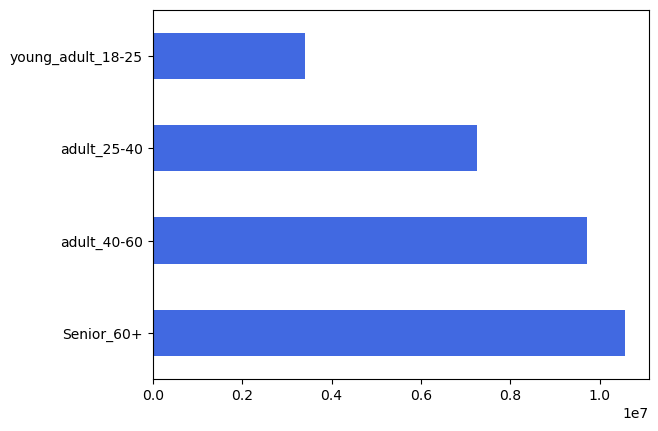

In [30]:
customers['age_category'].value_counts().plot(kind = 'barh', color = 'royalblue')

###  Investigate income and create income category column

In [31]:
customers['income'].describe()

count    3.096456e+07
mean     8.937569e+04
std      4.256789e+04
min      2.590300e+04
25%      6.729200e+04
50%      9.676500e+04
75%      1.281020e+05
max      5.939010e+05
Name: income, dtype: float64

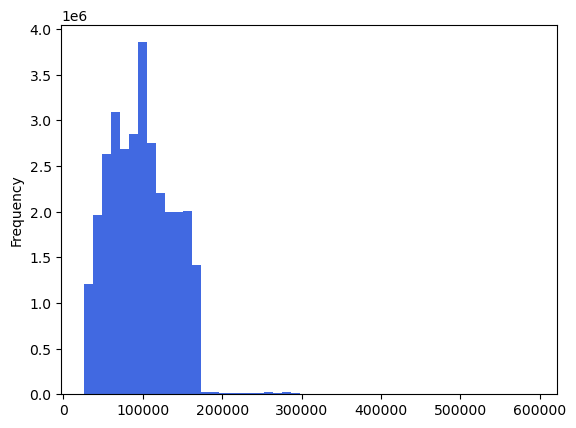

In [32]:
# Plot histogram for income

income_hist = customers['income'].plot.hist(bins = 50, color = 'royalblue')

####  The income categories are based on information from Pew Research. These are based on a family of three.

####  -  Low income  :  Less than 52,200
####  -  Middle income  :  52,200 - 156,600
####  -  Upper income	 :   More than 156,600

In [33]:
# Create an income category flag

customers.loc[customers['income'] < 52200, 'income_category'] = 'Low_income'
customers.loc[(customers['income'] >= 52200) & (customers['income'] < 156600), 'income_category'] = 'Middle_income'
customers.loc[customers['income'] >= 156600, 'income_category'] = 'Upper_income'

In [34]:
customers['income_category'].value_counts()

Middle_income    24541333
Low_income        3691708
Upper_income      2731523
Name: income_category, dtype: int64

In [35]:
customers.sample(5)

,order_id,user_id,order_number,orders_day_of_week,hour_order_was_placed,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,department_id,prices,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_spent,spending_flag,order_freq,order_freq_flag,gender,state,age,date_joined,number_of_dependents,family_status,income,region,activity_flag,age_category,income_category
2836230,1489466,6118,39,1,15,5.0,34969,9,1,Red Vine Tomato,4,4.5,Low-range product,Busiest days,Most orders,74,Loyal customer,7.285829,Low spender,4.0,Frequent customer,Male,West Virginia,24,2019-03-28,1,married,91168.0,South,High activity,young_adult_18-25,Middle_income
6162116,3131935,55780,1,1,7,NaN,2665,2,0,Triple Zero Chocolate Greek Yogurt,16,6.2,Mid-range product,Busiest days,Average orders,10,New customer,8.469106,Low spender,14.0,Regular customer,Male,Mississippi,73,2018-03-20,1,married,152862.0,South,High activity,Senior_60+,Middle_income
22788882,2647826,91732,5,5,15,5.0,17579,21,1,Cream Top Strawberry on the Bottom Yogurt,16,10.1,Mid-range product,Regularly day,Most orders,7,New customer,8.815574,Low spender,9.0,Frequent customer,Male,Massachusetts,74,2019-10-17,3,married,158751.0,Northeast,High activity,Senior_60+,Upper_income
21736556,1907841,14357,18,5,20,11.0,30456,2,1,Key Lime Cilantro Taco Skillet Sauce with Roas...,6,3.1,Low-range product,Regularly day,Average orders,19,Regular customer,8.254658,Low spender,9.0,Frequent customer,Female,New Mexico,44,2017-07-21,1,married,125498.0,West,High activity,adult_40-60,Middle_income
20611512,3385913,180390,3,0,14,7.0,18027,10,1,Ezekiel 4:9 Bread Organic Sprouted Whole Grain,3,3.4,Low-range product,Busiest days,Most orders,44,Loyal customer,8.008571,Low spender,7.0,Frequent customer,Female,Arizona,75,2019-04-16,0,divorced/widowed,132323.0,West,High activity,Senior_60+,Middle_income


<AxesSubplot:>

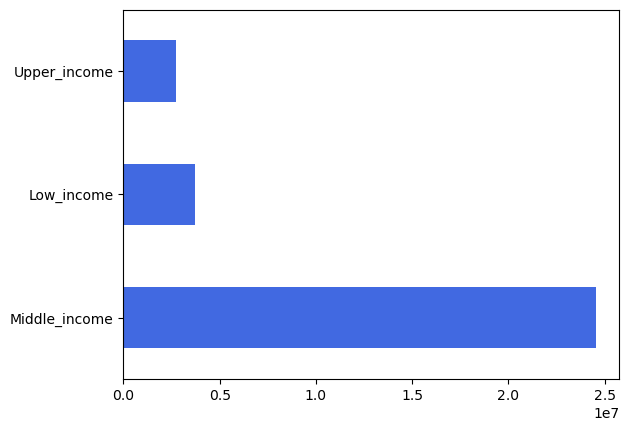

In [36]:
customers['income_category'].value_counts().plot(kind = 'barh', color = 'royalblue')

###  Investigate number of dependents and create number of dependents category column

In [37]:
customers['number_of_dependents'].describe()

count    3.096456e+07
mean     1.501819e+00
std      1.118896e+00
min      0.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      3.000000e+00
Name: number_of_dependents, dtype: float64

####  We are going to assume that "dependents" means children living in the home. 

####  The categories will be:
####  -  Zero children
####  -  1 or 2 children
####  -  3 or more children

In [38]:
# Create an number of dependents category flag

customers.loc[customers['number_of_dependents'] == 0, 'dependents_category'] = 'Zero Children'
customers.loc[customers['number_of_dependents'].isin([1, 2]), 'dependents_category'] = '1 or 2 children'
customers.loc[customers['number_of_dependents'] >= 3, 'dependents_category'] = '3+ children'

In [39]:
customers['dependents_category'].value_counts()

1 or 2 children    15452367
3+ children         7772516
Zero Children       7739681
Name: dependents_category, dtype: int64

<AxesSubplot:>

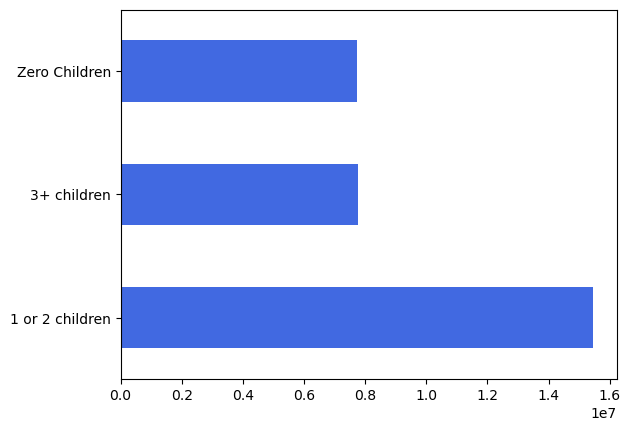

In [40]:
customers['dependents_category'].value_counts().plot(kind = 'barh', color = 'royalblue')

###  Investigate hour_order_was_placed and segment customers

In [41]:
customers['hour_order_was_placed'].value_counts()

10    2649744
11    2614880
14    2567903
13    2539276
15    2535966
12    2495795
16    2413681
9     2363611
17    1982345
8     1659110
18    1551184
19    1193878
20     930909
7      863213
21     763111
22     607060
23     384554
6      281013
0      208042
1      109621
5       84418
2       65691
4       50763
3       48796
Name: hour_order_was_placed, dtype: int64

<AxesSubplot:title={'center':'Hour Orders Are Placed'}, xlabel='Hour', ylabel='Number of Orders Placed (millions)'>

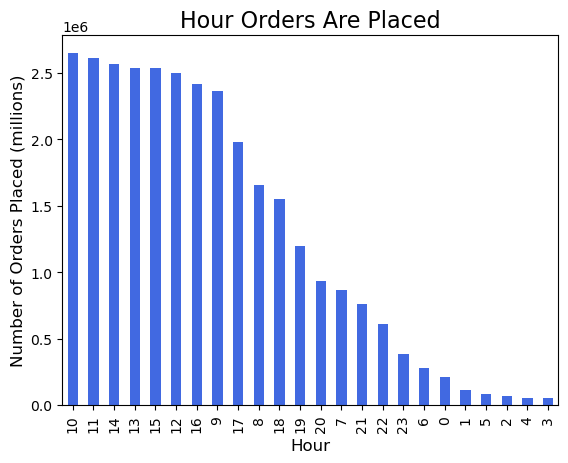

In [42]:
# Bar plot for hour orders are placed

hour_order_placed_bar = customers['hour_order_was_placed'].value_counts().plot(kind='bar', color = 'royalblue')
plt.title("Hour Orders Are Placed", fontsize = '16')
plt.ylabel('Number of Orders Placed (millions)', fontsize = 12)
plt.xlabel('Hour',  fontsize = 12)

hour_order_placed_bar


Hour category groupings (based on observed order patterns)

- Day:  8:00am to 6:59pm
- Evening:  7:00pm to 11:59pm
- Overnight/Early Morning:  12:00am to 7:59am

In [43]:
# Create an hour order was placed category flag

customers.loc[customers['hour_order_was_placed'].isin([8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]), 'time_of_order'] = 'Day'
customers.loc[customers['hour_order_was_placed'].isin([19, 20, 21, 22, 23]), 'time_of_order'] = 'Evening'
customers.loc[customers['hour_order_was_placed'].isin([ 0, 1, 2, 3, 4, 5, 6, 7]), 'time_of_order'] = 'Overnight'

In [44]:
customers['time_of_order'].value_counts()

Day          25373495
Evening       3879512
Overnight     1711557
Name: time_of_order, dtype: int64

<AxesSubplot:title={'center':'Time of Order Categories'}, xlabel='Frequency (millions)'>

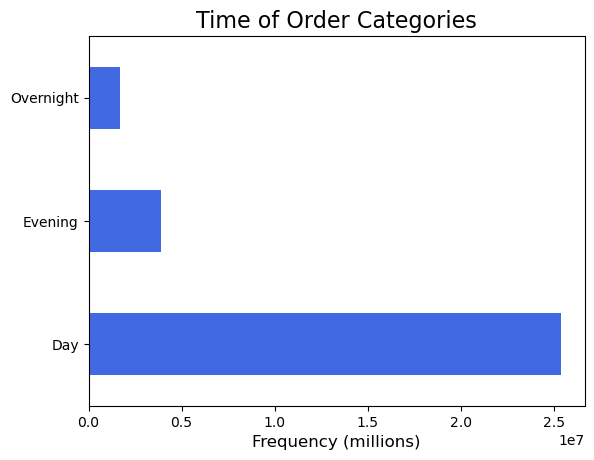

In [45]:
time_of_order_cat_barh = customers['time_of_order'].value_counts().plot(kind='barh', color = 'royalblue')
plt.title("Time of Order Categories", fontsize = '16')
#plt.ylabel('Number of Orders Placed (millions)', fontsize = 12)
plt.xlabel('Frequency (millions)',  fontsize = 12)

time_of_order_cat_barh

In [46]:
###  Investigate the Price Range categories of products

In [47]:
customers['price_range_loc'].value_counts()

Mid-range product     20891771
Low-range product      9674840
High-range product      397953
Name: price_range_loc, dtype: int64

<AxesSubplot:title={'center':'Price Range Categories'}, ylabel='Frequency (millions)'>

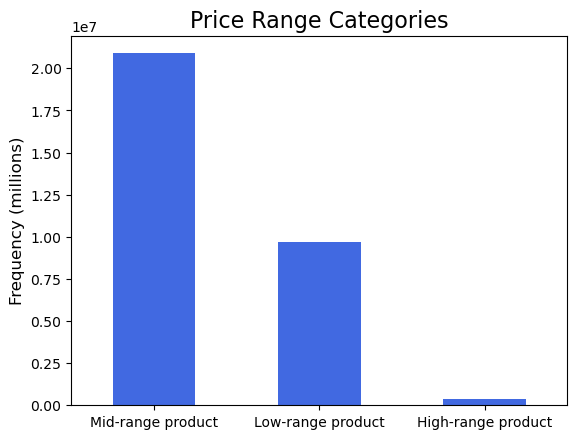

In [48]:
price_range_cat_bar = customers['price_range_loc'].value_counts().plot(kind='bar', color = 'royalblue', rot=0)
plt.title("Price Range Categories", fontsize = '16')
#plt.xlabel('Number of Orders Placed (millions)', fontsize = 12)
plt.ylabel('Frequency (millions)',  fontsize = 12)

price_range_cat_bar

In [49]:
# Whad departments are included in the High-range products?

customers[customers['price_range_loc'] == 'High-range product'].department_id.value_counts()

12    392855
16      4877
13       221
Name: department_id, dtype: int64

OBSERVATION: The overwhelming majority of products are in the mid-range and low-range categories. The very small number of products in the high-range category from the meat/seafood department with a much smaller number from the dairy and pantry departments.

OBSERVATION: The overwhelming majority of orders are placed during the day category

###  Investigate day order was placed

In [50]:
# Create series for counts or orders placed on each day

day_order_placed = customers['orders_day_of_week'].value_counts()
day_order_placed

0    5908610
1    5411686
6    4291304
5    4033729
2    4024706
3    3669535
4    3624994
Name: orders_day_of_week, dtype: int64

In [51]:
day_order_placed.info()

<class 'pandas.core.series.Series'>
Int64Index: 7 entries, 0 to 4
Series name: orders_day_of_week
Non-Null Count  Dtype
--------------  -----
7 non-null      int64
dtypes: int64(1)
memory usage: 112.0 bytes


In [52]:
# Convert series to df

df_day_order_placed = day_order_placed.to_frame()
df_day_order_placed

,orders_day_of_week
0,5908610
1,5411686
6,4291304
5,4033729
2,4024706
3,3669535
4,3624994


In [53]:
# Create second index column

df_day_order_placed['index1'] = df_day_order_placed.index
df_day_order_placed

,orders_day_of_week,index1
0,5908610,0
1,5411686,1
6,4291304,6
5,4033729,5
2,4024706,2
3,3669535,3
4,3624994,4


In [54]:
# Map new days of week column to index1 column

equiv_dict = {0:'Saturday', 1:'Sunday', 2:'Monday', 3:'Tuesday', 4:'Wednesday', 5:'Thursday', 6:'Friday'}
df_day_order_placed['day'] = df_day_order_placed['index1'].map(equiv_dict)
df_day_order_placed

,orders_day_of_week,index1,day
0,5908610,0,Saturday
1,5411686,1,Sunday
6,4291304,6,Friday
5,4033729,5,Thursday
2,4024706,2,Monday
3,3669535,3,Tuesday
4,3624994,4,Wednesday


In [55]:
# Rename 'orders_day_of_week' to 'number_of_orders'

df_day_order_placed.rename(columns = {'orders_day_of_week':'number_of_orders'}, inplace=True)
df_day_order_placed

,number_of_orders,index1,day
0,5908610,0,Saturday
1,5411686,1,Sunday
6,4291304,6,Friday
5,4033729,5,Thursday
2,4024706,2,Monday
3,3669535,3,Tuesday
4,3624994,4,Wednesday


In [56]:
# Remove index1 column

df_day_order_placed = df_day_order_placed[['day', 'number_of_orders']]
df_day_order_placed

,day,number_of_orders
0,Saturday,5908610
1,Sunday,5411686
6,Friday,4291304
5,Thursday,4033729
2,Monday,4024706
3,Tuesday,3669535
4,Wednesday,3624994


<AxesSubplot:title={'center':'Day Orders Are Placed'}, xlabel='Number of Orders Placed (millions)', ylabel='Day'>

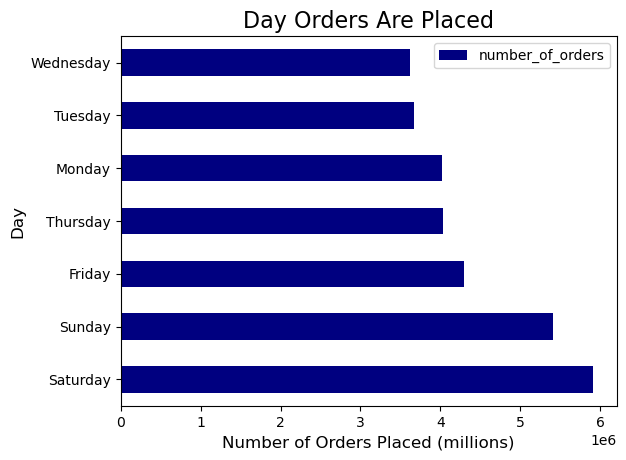

In [57]:
# Bar plot for day orders are placed

df_day_order_placed_barh = df_day_order_placed.plot.barh(x='day', y='number_of_orders', color= ['navy'])#, 'deepskyblue', 'lightblue', 'blue', 'cyan','steelblue', 'dodgerblue'])
#orders_day_of_week_bar.legend(title='Days', bbox_to_anchor=(1, 1.02), loc='upper left', labels=['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])
plt.title("Day Orders Are Placed", fontsize = '16')
plt.xlabel('Number of Orders Placed (millions)', fontsize = 12)
plt.ylabel('Day',  fontsize = 12)

df_day_order_placed_barh

OBSERVATION: Most orders were placed on weekends (Sat, Sun, then Fri). The fewest orders were placed on Wednesday and Tuesday.

###  Segment customers by specific departments

- note that we must first add department names to customers df

In [58]:
# Importing departments Dataframe

departments = pd.read_csv(os.path.join(path_prep, 'departments_wrangled.csv'), index_col = False)

In [59]:
departments.head()

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [60]:
departments.rename(columns= {"Unnamed: 0": "department_id"}, inplace = True)

In [61]:
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [62]:
# Create dictionary 

departments_map = dict(zip(departments["department_id"], departments["department"]))

In [63]:
departments_map

{1: 'frozen',
 2: 'other',
 3: 'bakery',
 4: 'produce',
 5: 'alcohol',
 6: 'international',
 7: 'beverages',
 8: 'pets',
 9: 'dry goods pasta',
 10: 'bulk',
 11: 'personal care',
 12: 'meat seafood',
 13: 'pantry',
 14: 'breakfast',
 15: 'canned goods',
 16: 'dairy eggs',
 17: 'household',
 18: 'babies',
 19: 'snacks',
 20: 'deli',
 21: 'missing'}

In [64]:
# Map department names into customers df

customers['department'] = customers['department_id'].map(departments_map)

In [65]:
customers.head()

,order_id,user_id,order_number,orders_day_of_week,hour_order_was_placed,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,department_id,prices,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_spent,spending_flag,order_freq,order_freq_flag,gender,state,age,date_joined,number_of_dependents,family_status,income,region,activity_flag,age_category,income_category,dependents_category,time_of_order,department
0,2539329,1,1,2,8,NaN,196,1,0,Soda,7,9.0,Mid-range product,Regularly day,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423.0,South,High activity,adult_25-40,Low_income,3+ children,Day,beverages
1,2398795,1,2,3,7,15.0,196,1,1,Soda,7,9.0,Mid-range product,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423.0,South,High activity,adult_25-40,Low_income,3+ children,Overnight,beverages
2,473747,1,3,3,12,21.0,196,1,1,Soda,7,9.0,Mid-range product,Slowest days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423.0,South,High activity,adult_25-40,Low_income,3+ children,Day,beverages
3,2254736,1,4,4,7,29.0,196,1,1,Soda,7,9.0,Mid-range product,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423.0,South,High activity,adult_25-40,Low_income,3+ children,Overnight,beverages
4,431534,1,5,4,15,28.0,196,1,1,Soda,7,9.0,Mid-range product,Slowest days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423.0,South,High activity,adult_25-40,Low_income,3+ children,Day,beverages


###  Customers who purchase alcohol

In [66]:
# Creating alcohol_purchase column

customers.loc[customers['department'] =='alcohol', 'alcohol_purchase'] = 'Yes'
customers.loc[customers['department'] !='alcohol', 'alcohol_purchase'] = 'No'

In [67]:
customers['alcohol_purchase'].value_counts(dropna = False,normalize = True)

No     0.995329
Yes    0.004671
Name: alcohol_purchase, dtype: float64

###  Customers who purchase  baby food, etc.

In [68]:
# Create have_baby column

customers.loc[customers['department'] =='babies', 'have_baby'] = 'Yes'
customers.loc[customers['department'] !='babies', 'have_baby'] = 'No'

In [69]:
customers['have_baby'].value_counts(dropna = False, normalize = True)

No     0.986746
Yes    0.013254
Name: have_baby, dtype: float64

###  Customers who purchase pet items

In [70]:
# Creating have_pet column

customers.loc[customers['department'] =='pets', 'have_pet'] = 'Yes'
customers.loc[customers['department'] !='pets', 'have_pet'] = 'No'

In [71]:
customers['have_pet'].value_counts(dropna = False, normalize = True)

No     0.996995
Yes    0.003005
Name: have_pet, dtype: float64

###  6. Create appropriate visualizations to show the distribution of profiles.

Text(0.5, 1.0, 'Customers Who Purchase Alcohol')

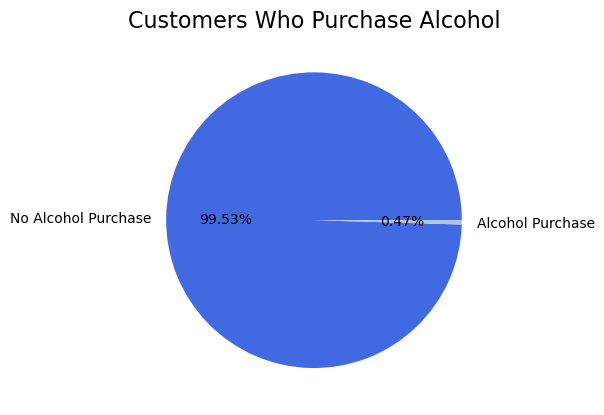

In [72]:
# Pie chart for alcohol purchases

alcohol_purchase_pie = customers['alcohol_purchase'].value_counts().plot.pie(labels = ['No Alcohol Purchase', 'Alcohol Purchase'], autopct=('%.2f%%'), colors = ['royalblue', 'lightsteelblue'], label = '')
#alcohol_purchase_pie.legend( loc = 'lower right')
plt.title("Customers Who Purchase Alcohol", fontsize = '16')


Text(0.5, 1.0, 'Customers Who Have a Baby')

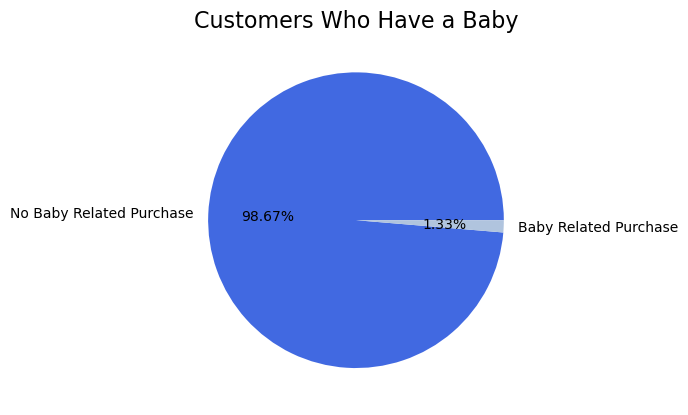

In [73]:
# Pie chart for baby related purchases

have_baby_pie = customers['have_baby'].value_counts().plot.pie(labels = ['No Baby Related Purchase', 'Baby Related Purchase'], autopct=('%.2f%%'), colors = ['royalblue', 'lightsteelblue'], label = '')
#have_baby_pie.legend( loc = 'lower right')
plt.title("Customers Who Have a Baby", fontsize = '16')

Text(0.5, 1.0, 'Customers Who Have a Pet')

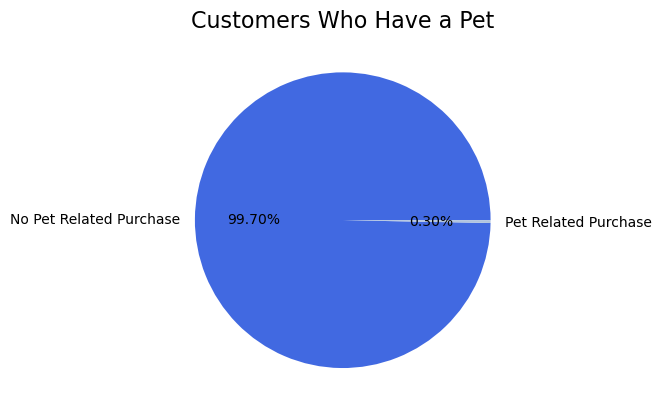

In [74]:
# Pie chart for pet purchases

have_pet_pie = customers['have_pet'].value_counts().plot.pie(labels = ['No Pet Related Purchase', 'Pet Related Purchase'], autopct=('%.2f%%'), colors = ['royalblue', 'lightsteelblue'], label = '')
#have_pet_pie.legend( loc = 'lower right')
plt.title("Customers Who Have a Pet", fontsize = '16')

Text(0.5, 1.0, 'Number of Children in Household')

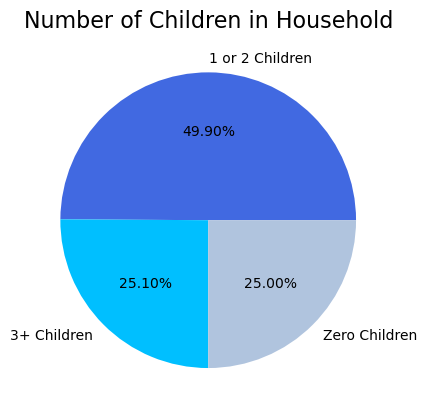

In [75]:
# Pie chart for number of children in the household

dependents_category_pie = customers['dependents_category'].value_counts().plot.pie(labels = ['1 or 2 Children', '3+ Children',\
                    'Zero Children'], autopct=('%.2f%%'), colors = ['royalblue', 'deepskyblue', 'lightsteelblue'], label = '')
plt.title("Number of Children in Household", fontsize = '16')

Text(0.5, 1.0, 'Customer Income Categories')

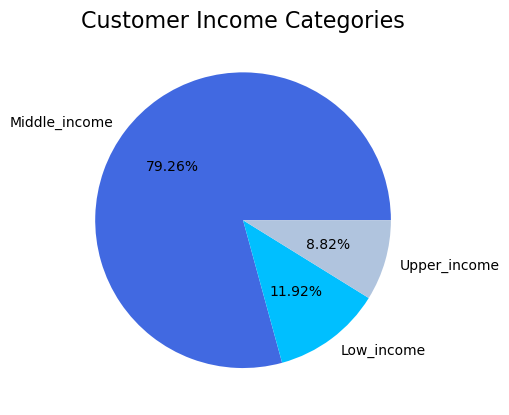

In [76]:
# Pie chart for customer income categories

income_category_pie = customers['income_category'].value_counts().plot.pie(labels = ['Middle_income', 'Low_income',\
                    'Upper_income'], autopct=('%.2f%%'), colors = ['royalblue', 'deepskyblue', 'lightsteelblue'], label = '')
plt.title("Customer Income Categories", fontsize = '16')

Text(0.5, 1.0, 'Customer Age Categories')

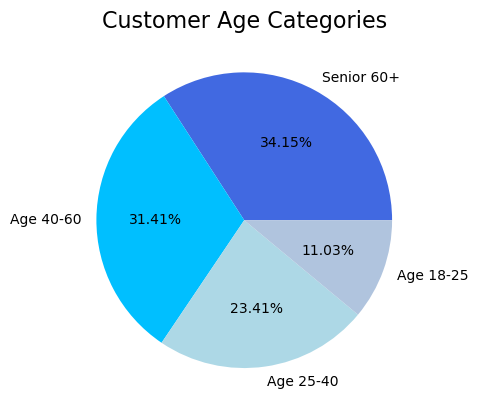

In [77]:
# Pie chart for customer age categories

age_category_pie = customers['age_category'].value_counts().plot.pie(labels = ['Senior 60+', 'Age 40-60', 'Age 25-40', \
                'Age 18-25'], autopct=('%.2f%%'), colors = ['royalblue', 'deepskyblue', 'lightblue', 'lightsteelblue'],\
                label = '')
plt.title("Customer Age Categories", fontsize = '16')

###  7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure

###  Age Profile

In [78]:
# Age category expenditure aggregation

customers.groupby('age_category').agg({'prices' : ['mean', 'min', 'max']})

prices           
                       mean  min   max
age_category                          
Senior_60+         7.795410  1.0  25.0
adult_25-40        7.782035  1.0  25.0
adult_40-60        7.791610  1.0  25.0
young_adult_18-25  7.790650  1.0  25.0

OBSERVATION: No significant difference in the mean.

In [79]:
# Age category frequency aggregation

customers.groupby('age_category').agg({'days_since_prior_order' : ['mean', 'min', 'max']})

days_since_prior_order           
                                    mean  min   max
age_category                                       
Senior_60+                     10.800665  0.0  30.0
adult_25-40                    10.834014  0.0  30.0
adult_40-60                    10.819702  0.0  30.0
young_adult_18-25              10.762997  0.0  30.0

OBSERVATION: No significant difference in the mean.

###  Customer income category

In [80]:
# Age category expenditure aggregation

customers.groupby('income_category').agg({'prices' : ['mean', 'min', 'max']})

prices           
                     mean  min   max
income_category                     
Low_income       6.766241  1.0  25.0
Middle_income    7.928405  1.0  25.0
Upper_income     7.936480  1.0  25.0

Text(0.5, 0, 'Income Category')

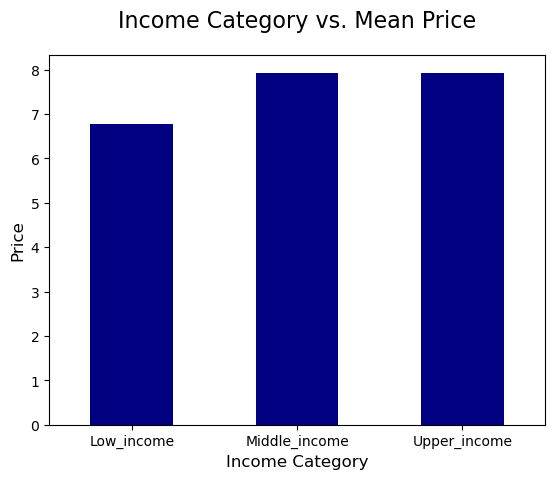

In [81]:
#  Isolate the mean and plot

income_category_prices_mean = customers.groupby('income_category').agg({'prices' : ['mean']})

bar_income_category_prices_mean = income_category_prices_mean.plot(kind = 'bar', rot = 0, color= 'navy', legend=None)
plt.title('Income Category vs. Mean Price', fontsize = 16, pad=20)
plt.ylabel('Price', fontsize = 12)
plt.xlabel('Income Category',  fontsize = 12)

OBSERVATION:  The lower income category spends less than the other two categories which are nearly equal

In [82]:
# Age category frequency aggregation

customers.groupby('income_category').agg({'days_since_prior_order' : ['mean', 'min', 'max']})

days_since_prior_order           
                                  mean  min   max
income_category                                  
Low_income                   11.152222  0.0  30.0
Middle_income                10.775523  0.0  30.0
Upper_income                 10.662901  0.0  30.0

Text(0.5, 0, 'Income Category')

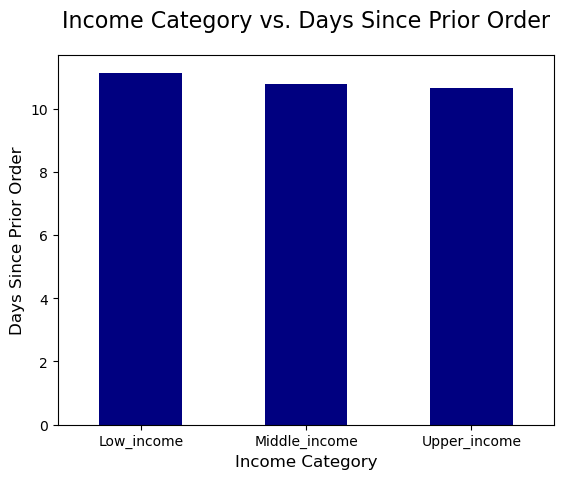

In [83]:
#  Isolate the mean and plot

income_cat_days_since_prior_mean = customers.groupby('income_category').agg({'days_since_prior_order' : ['mean']})

bar_income_cat_days_since_prior_mean = income_cat_days_since_prior_mean.plot(kind = 'bar', rot = 0, color= 'navy', legend=None)
plt.title('Income Category vs. Days Since Prior Order', fontsize = 16, pad=20)
plt.ylabel('Days Since Prior Order', fontsize = 12)
plt.xlabel('Income Category',  fontsize = 12)

OBSERVATION:  The lower income category order slightly less frequently than the other two categories which are nearly equal

###  Number of Dependents

In [84]:
# Age category expenditure aggregation

customers.groupby('number_of_dependents').agg({'prices' : ['mean', 'min', 'max']})

prices           
                          mean  min   max
number_of_dependents                     
0                     7.789532  1.0  25.0
1                     7.795875  1.0  25.0
2                     7.783980  1.0  25.0
3                     7.792853  1.0  25.0

OBSERVATION: No significant difference in the mean.

In [85]:
# Age category frequency aggregation

customers.groupby('number_of_dependents').agg({'days_since_prior_order' : ['mean', 'min', 'max']})

days_since_prior_order           
                                       mean  min   max
number_of_dependents                                  
0                                 10.791951  0.0  30.0
1                                 10.802001  0.0  30.0
2                                 10.830997  0.0  30.0
3                                 10.816223  0.0  30.0

OBSERVATION: No significant difference in the mean.

###  Departments

In [86]:
# Department category expenditure aggregation

customers.groupby('department').agg({'prices' : ['mean', 'min', 'max']})

prices           
                      mean  min   max
department                           
alcohol           8.150699  1.0  15.0
babies            7.634399  1.0  15.0
bakery            7.857482  1.0  15.0
beverages         7.682556  1.0  15.0
breakfast         8.031647  1.0  14.9
bulk              8.346919  1.4  14.1
canned goods      7.546660  1.0  15.0
dairy eggs        8.335679  1.0  15.0
deli              7.783347  1.0  15.0
dry goods pasta   7.349370  1.0  15.0
frozen            7.733725  1.0  15.0
household         7.379951  1.0  15.0
international     7.678797  1.0  15.0
meat seafood     16.300034  8.0  25.0
missing           8.660655  1.0  15.0
other             6.961995  1.1  15.0
pantry            8.014482  1.0  20.0
personal care     7.998744  1.0  15.0
pets              7.887489  1.0  15.0
produce           7.980348  1.0  15.0
snacks            4.275555  1.6   7.0

OBSERVATION: The mean price for meat/seafood is by far the highest and the mean price for snacks is by far the lowest

###  Investigate Days Since Prior Order by Department

In [87]:
# Department category frequency aggregation

customers.groupby('department').agg({'days_since_prior_order' : ['mean', 'min', 'max']})

days_since_prior_order           
                                  mean  min   max
department                                       
alcohol                      10.006658  0.0  30.0
babies                        9.780844  0.0  30.0
bakery                       10.808401  0.0  30.0
beverages                    10.768469  0.0  30.0
breakfast                    11.001313  0.0  30.0
bulk                          9.880211  0.0  30.0
canned goods                 11.316872  0.0  30.0
dairy eggs                   10.709201  0.0  30.0
deli                         11.051389  0.0  30.0
dry goods pasta              11.440362  0.0  30.0
frozen                       11.413880  0.0  30.0
household                    11.649305  0.0  30.0
international                10.963731  0.0  30.0
meat seafood                 11.123647  0.0  30.0
missing                       9.869551  0.0  30.0
other                        10.624647  0.0  30.0
pantry                       10.835976  0.0  30.0
personal care                11.256240  0.0  30.0
pets                         11.593531  0.0  30.0
produce                      10.574119  0.0  30.0
snacks                       10.671110  0.0  30.0

OBSERVATION: Baby items are ordered more frequently than any other department

In [88]:
order_freq_by_dept = customers.groupby('department').days_since_prior_order.mean().sort_values()

order_freq_by_dept

department
babies              9.780844
missing             9.869551
bulk                9.880211
alcohol            10.006658
produce            10.574119
other              10.624647
snacks             10.671110
dairy eggs         10.709201
beverages          10.768469
bakery             10.808401
pantry             10.835976
international      10.963731
breakfast          11.001313
deli               11.051389
meat seafood       11.123647
personal care      11.256240
canned goods       11.316872
frozen             11.413880
dry goods pasta    11.440362
pets               11.593531
household          11.649305
Name: days_since_prior_order, dtype: float64

<AxesSubplot:title={'center':'Days Since Prior Order by Department'}, xlabel='Days Since Prior Order', ylabel='Department'>

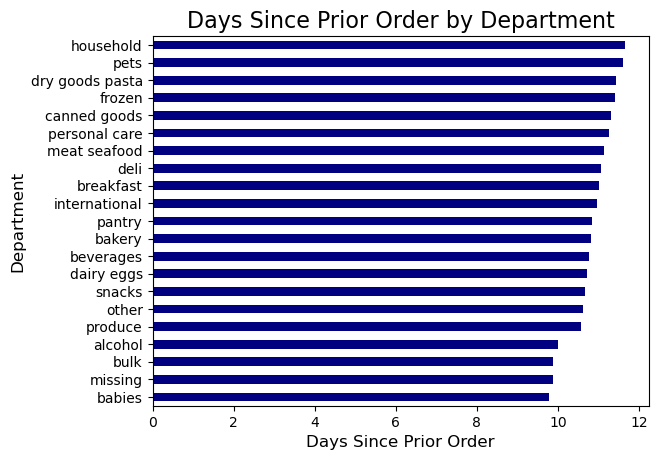

In [89]:
order_freq_by_dept_barh = customers.groupby('department').days_since_prior_order.mean().sort_values().plot(kind='barh', color='navy')

plt.title("Days Since Prior Order by Department", fontsize = '16')
plt.ylabel('Department', fontsize = 12)
plt.xlabel('Days Since Prior Order',  fontsize = 12)

order_freq_by_dept_barh

###  Alcohol purchasers

In [90]:
# Alcohol purchasers expenditure aggregation

customers.groupby('alcohol_purchase').agg({'prices' : ['mean', 'min', 'max']})

prices           
                      mean  min   max
alcohol_purchase                     
No                7.788870  1.0  25.0
Yes               8.150699  1.0  15.0

Text(0.5, 0, 'Purchased Alcohol')

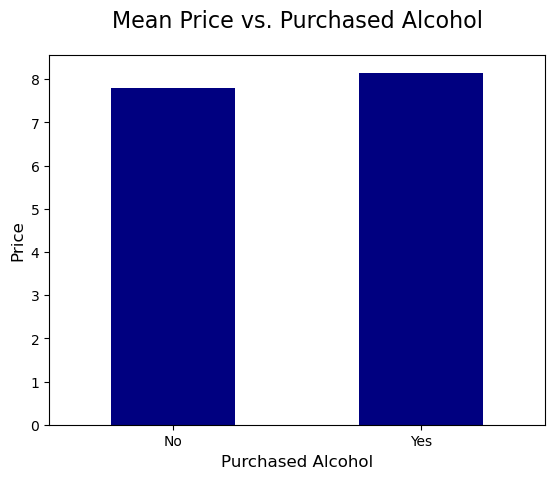

In [91]:
#  Isolate the mean and plot

alcohol_prices_mean = customers.groupby('alcohol_purchase').agg({'prices' : ['mean']})

bar_alcohol_prices_mean = alcohol_prices_mean.plot(kind = 'bar', rot = 0, color= 'navy', legend=None)
plt.title('Mean Price vs. Purchased Alcohol', fontsize = 16, pad=20)
plt.ylabel('Price', fontsize = 12)
plt.xlabel('Purchased Alcohol',  fontsize = 12)

OBSERVATION:  Alcohol purchasers have a higher mean purchase price than non alcohol purchasers.

In [92]:
# Alcohol purchasers frequency aggregation

customers.groupby('alcohol_purchase').agg({'days_since_prior_order' : ['mean', 'min', 'max']})

days_since_prior_order           
                                   mean  min   max
alcohol_purchase                                  
No                            10.814016  0.0  30.0
Yes                           10.006658  0.0  30.0

Text(0.5, 0, 'Purchased Alcohol')

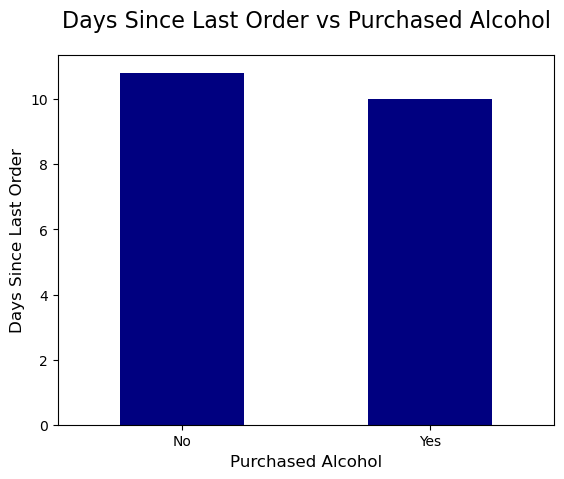

In [93]:
#  Isolate the mean and plot

alcohol_prior_order_mean = customers.groupby('alcohol_purchase').agg({'days_since_prior_order' : ['mean']})

bar_alcohol_prior_order_mean = alcohol_prior_order_mean.plot(kind = 'bar', rot = 0, color= 'navy', legend=None)
plt.title('Days Since Last Order vs Purchased Alcohol', fontsize = 16, pad=20)
plt.ylabel('Days Since Last Order', fontsize = 12)
plt.xlabel('Purchased Alcohol',  fontsize = 12)

OBSERVATION:  Alcohol purchasers order slightly more frequently than non purchasers.

###  Customers with baby

In [94]:
# Customers with baby expenditure aggregation

customers.groupby('have_baby').agg({'prices' : ['mean', 'min', 'max']})

prices           
               mean  min   max
have_baby                     
No         7.792658  1.0  25.0
Yes        7.634399  1.0  15.0

Text(0.5, 0, 'Have Baby')

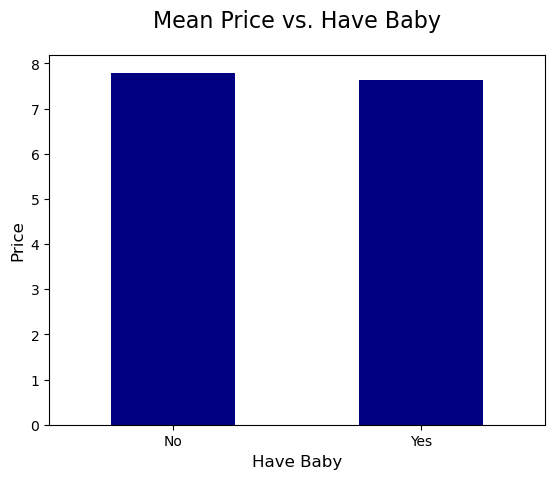

In [95]:
#  Isolate the mean and plot

have_baby_prices_mean = customers.groupby('have_baby').agg({'prices' : ['mean']})

bar_have_baby_prices_mean = have_baby_prices_mean.plot(kind = 'bar', rot = 0, color= 'navy', legend=None)
plt.title('Mean Price vs. Have Baby', fontsize = 16, pad=20)
plt.ylabel('Price', fontsize = 12)
plt.xlabel('Have Baby',  fontsize = 12)

OBSERVATION:  No significant difference.

In [96]:
# Customers with baby frequency aggregation

customers.groupby('have_baby').agg({'days_since_prior_order' : ['mean', 'min', 'max']})

days_since_prior_order           
                            mean  min   max
have_baby                                  
No                     10.824248  0.0  30.0
Yes                     9.780844  0.0  30.0

Text(0.5, 0, 'Have Baby')

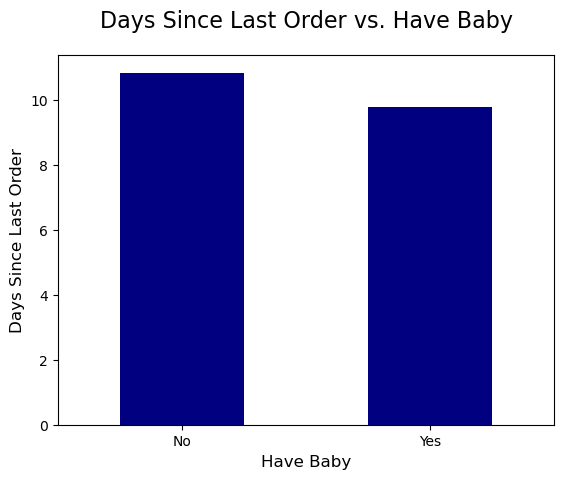

In [97]:
#  Isolate the mean and plot

have_baby_days_since_prior_mean = customers.groupby('have_baby').agg({'days_since_prior_order' : ['mean']})

bar_have_baby_days_since_prior_mean = have_baby_days_since_prior_mean.plot(kind = 'bar', rot = 0, color= 'navy', legend=None)
plt.title('Days Since Last Order vs. Have Baby', fontsize = 16, pad=20)
plt.ylabel('Days Since Last Order', fontsize = 12)
plt.xlabel('Have Baby',  fontsize = 12)

OBSERVATION: Customers with babies order slightly more frequently than customers who do not have babies.

###  Customers with pet(s)

In [98]:
# Customers with pets expenditure aggregation

customers.groupby('have_pet').agg({'prices' : ['mean', 'min', 'max']})

prices           
              mean  min   max
have_pet                     
No        7.790268  1.0  25.0
Yes       7.887489  1.0  15.0

OBSERVATION: No significant difference.

In [99]:
# Customers with pets frequency aggregation

customers.groupby('have_pet').agg({'days_since_prior_order' : ['mean', 'min', 'max']})

days_since_prior_order           
                           mean  min   max
have_pet                                  
No                    10.807946  0.0  30.0
Yes                   11.593531  0.0  30.0

Text(0.5, 0, 'Have Pet')

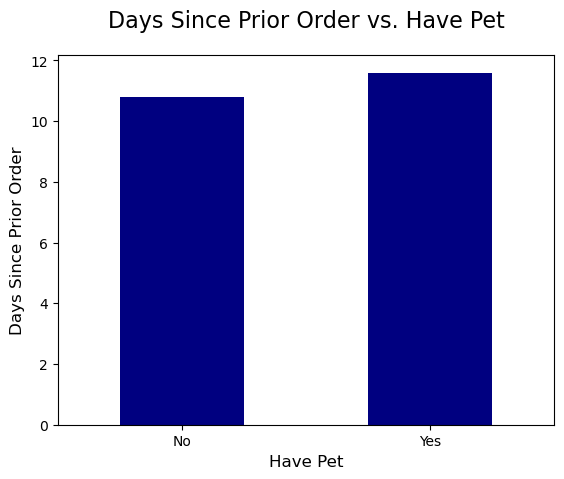

In [100]:
#  Isolate the mean and plot

have_pet_days_since_prior_mean = customers.groupby('have_pet').agg({'days_since_prior_order' : ['mean']})
bar_have_pet_days_since_prior_mean = have_pet_days_since_prior_mean.plot(kind = 'bar', rot = 0, color= 'navy', legend=None)
plt.title('Days Since Prior Order vs. Have Pet', fontsize = 16, pad=20)
plt.ylabel('Days Since Prior Order', fontsize = 12)
plt.xlabel('Have Pet',  fontsize = 12)

OBSERVATION: Customers with pets order slightly less frequently than customers who do not have pets.

### Family size

In [101]:
# Family size expenditure aggregation

customers.groupby('dependents_category').agg({'prices' : ['mean', 'min', 'max']})

prices           
                         mean  min   max
dependents_category                     
1 or 2 children      7.789922  1.0  25.0
3+ children          7.792853  1.0  25.0
Zero Children        7.789532  1.0  25.0

In [102]:
# Family size frequency of order aggregation

customers.groupby('dependents_category').agg({'prices' : ['mean', 'min', 'max']})

prices           
                         mean  min   max
dependents_category                     
1 or 2 children      7.789922  1.0  25.0
3+ children          7.792853  1.0  25.0
Zero Children        7.789532  1.0  25.0

OBSERVATION: No significant difference.

###  Time of order

In [103]:
# Time of order expenditure aggregation

customers.groupby('time_of_order').agg({'prices' : ['mean', 'min', 'max']})

prices           
                   mean  min   max
time_of_order                     
Day            7.786869  1.0  25.0
Evening        7.801838  1.0  25.0
Overnight      7.819721  1.0  25.0

OBSERVATION: No significant difference.

In [104]:
# Time of order frequency aggregation

customers.groupby('time_of_order').agg({'days_since_prior_order' : ['mean', 'min', 'max']})

days_since_prior_order           
                                mean  min   max
time_of_order                                  
Day                        10.855805  0.0  30.0
Evening                    10.495416  0.0  30.0
Overnight                  10.847251  0.0  30.0

OBSERVATION: No significant difference.

###  8. Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

###  Compare loyalty category across regions

In [105]:
# Compare loyalty category across regions

ct_loyalty_region = pd.crosstab(customers['region'], customers['loyalty_flag'], dropna = False)
ct_loyalty_region

loyalty_flag,Loyal customer,New customer,Regular customer
region,,,
Midwest,2373774,1136761,3750978
Northeast,1841785,842156,2780744
South,3405844,1593664,5311631
West,2662690,1231114,4033423


<AxesSubplot:title={'center':'Customer Loyalty in each Region'}, xlabel='Region', ylabel='Number of Customers (millions)'>

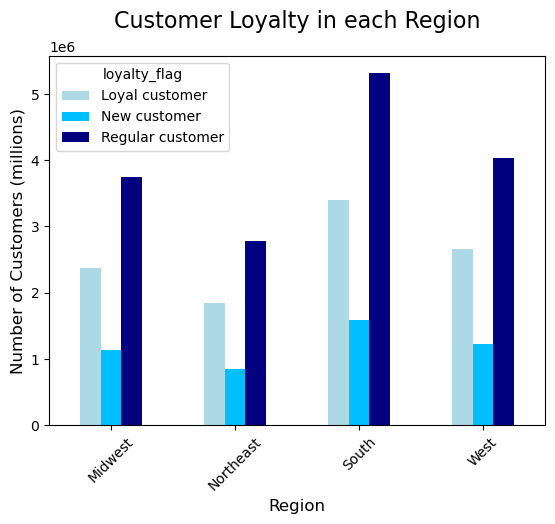

In [106]:
bar_ct_loyalty_region = ct_loyalty_region.plot(kind = 'bar', rot = 45, color= ['lightblue', 'deepskyblue','navy'])
plt.title('Customer Loyalty in each Region', fontsize = 16, pad=20)
plt.ylabel('Number of Customers (millions)', fontsize = 12)
plt.xlabel('Region',  fontsize = 12)

bar_ct_loyalty_region

OBSERVATION:  The South Region has more customers, considerably more in some cases, than any other region

In [107]:
# Compare loyalty category across regions (normalized)

ct_loyalty_region_norm = pd.crosstab(customers['region'], customers['loyalty_flag'], dropna = False, normalize='index')
ct_loyalty_region_norm

loyalty_flag,Loyal customer,New customer,Regular customer
region,,,
Midwest,0.326898,0.156546,0.516556
Northeast,0.337034,0.154109,0.508857
South,0.330307,0.154558,0.515135
West,0.335892,0.155302,0.508806


OBSERVATION:  While the number of customers in each loyalty category varies across the regions, the proportion of regular to new to loyal is similar and consistient across all four regions. 

###  Compare loyalty category vs. order frequency

In [108]:
customers.head()

,order_id,user_id,order_number,orders_day_of_week,hour_order_was_placed,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,department_id,prices,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_spent,spending_flag,order_freq,order_freq_flag,gender,state,age,date_joined,number_of_dependents,family_status,income,region,activity_flag,age_category,income_category,dependents_category,time_of_order,department,alcohol_purchase,have_baby,have_pet
0,2539329,1,1,2,8,NaN,196,1,0,Soda,7,9.0,Mid-range product,Regularly day,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423.0,South,High activity,adult_25-40,Low_income,3+ children,Day,beverages,No,No,No
1,2398795,1,2,3,7,15.0,196,1,1,Soda,7,9.0,Mid-range product,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423.0,South,High activity,adult_25-40,Low_income,3+ children,Overnight,beverages,No,No,No
2,473747,1,3,3,12,21.0,196,1,1,Soda,7,9.0,Mid-range product,Slowest days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423.0,South,High activity,adult_25-40,Low_income,3+ children,Day,beverages,No,No,No
3,2254736,1,4,4,7,29.0,196,1,1,Soda,7,9.0,Mid-range product,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423.0,South,High activity,adult_25-40,Low_income,3+ children,Overnight,beverages,No,No,No
4,431534,1,5,4,15,28.0,196,1,1,Soda,7,9.0,Mid-range product,Slowest days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423.0,South,High activity,adult_25-40,Low_income,3+ children,Day,beverages,No,No,No


In [109]:
# Compare loyalty category vs order frequency

ct_loyalty_order_freq_norm = pd.crosstab(customers['loyalty_flag'], customers['order_freq_flag'], dropna = False, normalize='index')

ct_loyalty_order_freq_norm.to_clipboard()
ct_loyalty_order_freq_norm

order_freq_flag,Frequent customer,Non-frequent customer,Regular customer
loyalty_flag,,,
Loyal customer,0.999598,0.000000,0.000402
New customer,0.269229,0.412911,0.317860
Regular customer,0.606623,0.057409,0.335967


<AxesSubplot:title={'center':'Customer Loyalty vs. Order Frequency'}, xlabel='Loyalty Level', ylabel='Percentage'>

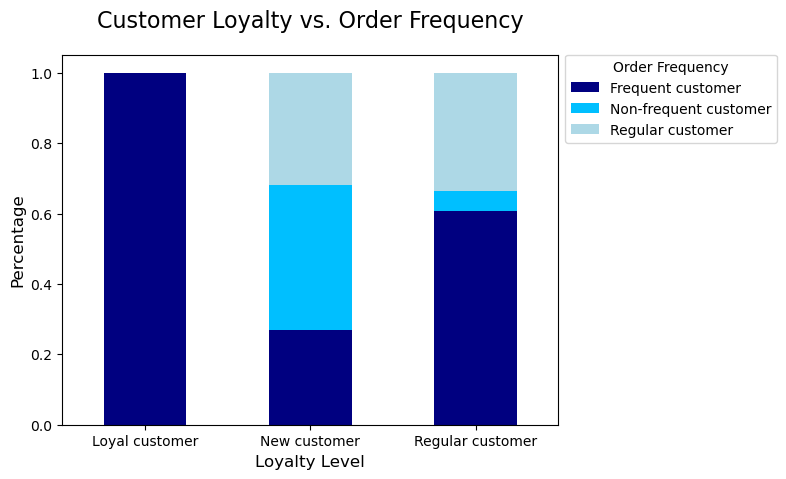

In [110]:
bar_ct_loyalty_order_freq_norm = ct_loyalty_order_freq_norm.plot(kind = 'bar', rot = 0, stacked=True, color= ['navy', 'deepskyblue','lightblue'])
plt.title('Customer Loyalty vs. Order Frequency', fontsize = 16, pad=20)
bar_ct_loyalty_order_freq_norm.legend(title='Order Frequency', bbox_to_anchor=(1, 1.02), loc='upper left')
plt.ylabel('Percentage', fontsize = 12)
plt.xlabel('Loyalty Level',  fontsize = 12)


bar_ct_loyalty_order_freq_norm

OBSERVATION: The most frequently ordered products are from the departments babies, bulk, and alcohol. All are ordered at a frequency ofevery 10 days or less Note that products with department unknown (missing) are also among the most frequently ordered.


###  Compare loyalty category vs. customer activity

In [111]:
# Compare loyalty category vs activity flag

ct_loyalty_activity_flag_norm = pd.crosstab(customers['loyalty_flag'], customers['activity_flag'], dropna = False, normalize='index')

#ct_loyalty_order_freq_norm.to_clipboard()
ct_loyalty_activity_flag_norm

activity_flag,High activity
loyalty_flag,
Loyal customer,1.0
New customer,1.0
Regular customer,1.0


In [112]:
loyalty_order_freq = customers.groupby('loyalty_flag').agg({'days_since_prior_order': ['mean']})
loyalty_order_freq

,days_since_prior_order
,mean
loyalty_flag,
Loyal customer,6.026656
New customer,17.598691
Regular customer,12.155135


Text(0.5, 0, 'Loyalty Level')

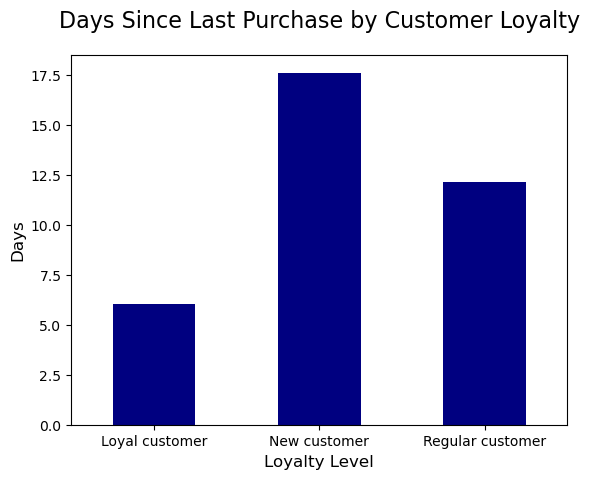

In [113]:
bar_loyalty_order_freq = loyalty_order_freq.plot(kind = 'bar', rot = 0, color= 'navy', legend=None)
plt.title('Days Since Last Purchase by Customer Loyalty', fontsize = 16, pad=20)
#bar_loyalty_order_freq.legend(title='Order Frequency', bbox_to_anchor=(1, 1.02), loc='upper left')
plt.ylabel('Days', fontsize = 12)
plt.xlabel('Loyalty Level',  fontsize = 12)

OBSERVATION: Loyal Customers order from the platform much more frequently, every 6.0 days compared to 12.1 days for Regular Customers and 17.6 days for New Customers. 

###  Comparing the income category across regions and departments

In [114]:
# Compare income category across regions

ct_income_region = pd.crosstab(customers['region'], customers['income_category'], dropna = False)
ct_income_region

income_category,Low_income,Middle_income,Upper_income
region,,,
Midwest,864462,5761821,635230
Northeast,648484,4340366,475835
South,1257064,8134024,920051
West,921698,6305122,700407


<AxesSubplot:title={'center':'Customer Income in each Region'}, xlabel='Region', ylabel='Number of Customers (millions)'>

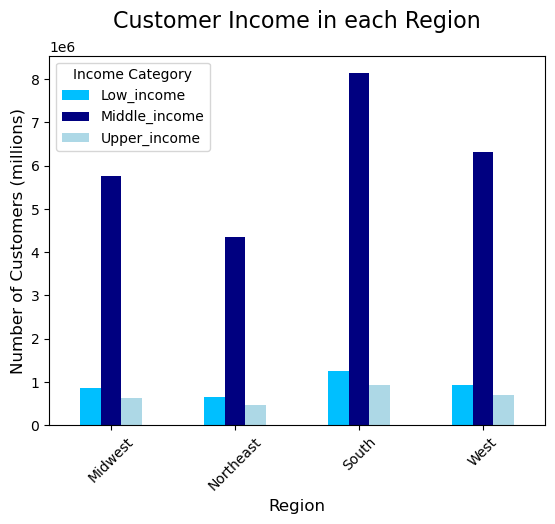

In [115]:
bar_ct_income_region = ct_income_region.plot(kind = 'bar', rot = 45, color= ['deepskyblue', 'navy', 'lightblue'])
plt.title('Customer Income in each Region', fontsize = 16, pad=20)
bar_ct_income_region.legend(title='Income Category', loc='upper left')
plt.ylabel('Number of Customers (millions)', fontsize = 12)
plt.xlabel('Region',  fontsize = 12)

bar_ct_income_region

OBSERVATION: The South Region has the most total income across all income categories, considerably more in some cases, than any other region

In [116]:
# Compare income category across regions (Normalized)

ct_income_region_norm = pd.crosstab(customers['region'], customers['income_category'], dropna = False, normalize='index')
ct_income_region_norm

income_category,Low_income,Middle_income,Upper_income
region,,,
Midwest,0.119047,0.793474,0.087479
Northeast,0.118668,0.794257,0.087075
South,0.121913,0.788858,0.089229
West,0.116270,0.795375,0.088355


OBSERVATION: While the total income across all income categories varies across the regions, the proportion of low to middle to upper is similar and consistient across all four regions.

### Compare income category across departments

In [117]:
# Compare income categories across departments

ct_income_department = pd.crosstab(customers['department'], customers['income_category'], dropna = False, normalize = 'columns')
ct_income_department

income_category,Low_income,Middle_income,Upper_income
department,,,
alcohol,0.005240,0.004352,0.006762
babies,0.009217,0.013827,0.013553
bakery,0.032006,0.036518,0.038979
beverages,0.111898,0.078907,0.081390
breakfast,0.026860,0.020947,0.021098
bulk,0.001371,0.001059,0.000880
canned goods,0.023989,0.033812,0.034314
dairy eggs,0.150362,0.169473,0.169502
deli,0.031648,0.032525,0.032507


OBSERVATIONS:

-  The breakdown of the spending of income categories across departments is most interesting when considered based on the percentage that each income category spends in each department:

-  Across most departments, customers from all three income categories spend similar percentages of their total amout spent.
-  Customers in the low income category spend twice as much on snacks (16%) compated to middle and upper income (both approx. 8%)
-  Customers in the low income category more on beverages (11%) compated to middle and upper income (both approx. 8%)
-  Customers in the low income category less than half as much on on meat/seafood (1%) compated to middle and upper income (both approx. 2.3%)
-  Customers in the Middle income category spend more on produce (30%) than both upper income (28.7%) and low income (24.8%)

In [118]:
ct_income_department.to_clipboard()

###  Comparing the dependents category across regions

In [119]:
# Compare dependents category across regions

ct_dependents_region = pd.crosstab(customers['region'], customers['dependents_category'], dropna = False)
ct_dependents_region

dependents_category,1 or 2 children,3+ children,Zero Children
region,,,
Midwest,3651411,1787286,1822816
Northeast,2728970,1381233,1354482
South,5143342,2585864,2581933
West,3928644,2018133,1980450


<AxesSubplot:title={'center':'Dependent Categories by Region'}, xlabel='Region', ylabel='Frequency (millions)'>

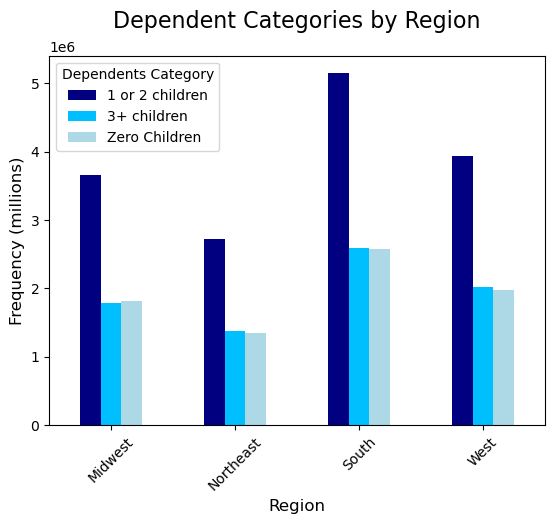

In [120]:
bar_ct_dependents_region = ct_dependents_region.plot(kind = 'bar', rot = 45, color= ['navy', 'deepskyblue', 'lightblue'])
plt.title('Dependent Categories by Region', fontsize = 16, pad=20)
bar_ct_dependents_region.legend(title='Dependents Category', loc='upper left')
plt.ylabel('Frequency (millions)', fontsize = 12)
plt.xlabel('Region',  fontsize = 12)

bar_ct_dependents_region

In [121]:
# Compare dependents category across regions

ct_dependents_region = pd.crosstab(customers['region'], customers['dependents_category'], dropna = False, normalize='index')
ct_dependents_region

dependents_category,1 or 2 children,3+ children,Zero Children
region,,,
Midwest,0.502844,0.246131,0.251024
Northeast,0.499383,0.252756,0.247861
South,0.498814,0.250784,0.250402
West,0.495589,0.254582,0.249829


OBSERVATION: The south region has the highest count in all three dependent categories. However, the proportion of the categories is nearly identical across all regions (50% / 25% / 25%)

###  Comparing the alcohol category across regions

In [122]:
# Compare alcohol category across regions

ct_alcohol_region = pd.crosstab(customers['region'], customers['alcohol_purchase'], dropna = False)
ct_alcohol_region

alcohol_purchase,No,Yes
region,,
Midwest,7227470,34043
Northeast,5439668,25017
South,10262326,48813
West,7890473,36754


<AxesSubplot:title={'center':'Customer Purchases of Alcohol by Region'}, xlabel='Region', ylabel='Frequency (millions)'>

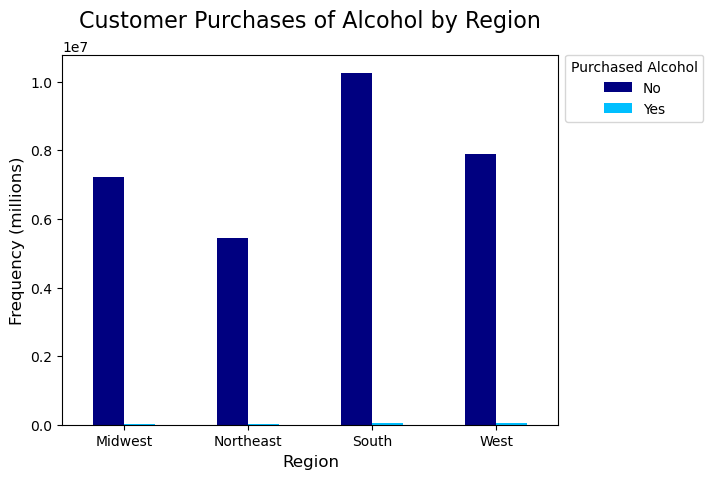

In [123]:
#  Plot alcohol purchased by regionion

bar_ct_alcohol_region = ct_alcohol_region.plot(kind = 'bar', rot = 0, stacked=False, color= ['navy', 'deepskyblue'])
plt.title('Customer Purchases of Alcohol by Region', fontsize = 16, pad=20)
bar_ct_alcohol_region.legend(title='Purchased Alcohol', bbox_to_anchor=(1, 1.02), loc='upper left')
plt.ylabel('Frequency (millions)', fontsize = 12)
plt.xlabel('Region',  fontsize = 12)


bar_ct_alcohol_region

In [124]:
# Compare alcohol category across regions (Normalized)

ct_alcohol_region_norm = pd.crosstab(customers['region'], customers['alcohol_purchase'], dropna = False, normalize='index')
ct_alcohol_region_norm

alcohol_purchase,No,Yes
region,,
Midwest,0.995312,0.004688
Northeast,0.995422,0.004578
South,0.995266,0.004734
West,0.995364,0.004636


<AxesSubplot:title={'center':'Percentage of Customers who Purchased Alcohol by Region'}, xlabel='Region', ylabel='Percentage'>

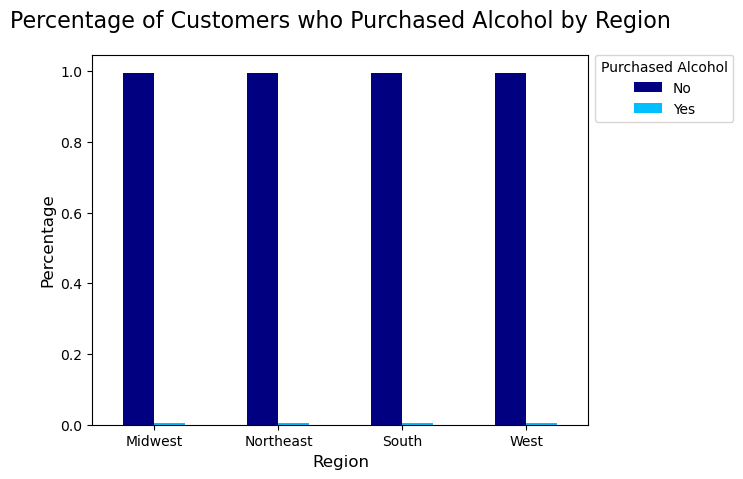

In [125]:
#  Plot alcohol purchased by regionion (normalized)

bar_ct_alcohol_region_norm = ct_alcohol_region_norm.plot(kind = 'bar', rot = 0, stacked=False, color= ['navy', 'deepskyblue'])
plt.title('Percentage of Customers who Purchased Alcohol by Region', fontsize = 16, pad=20)
bar_ct_alcohol_region_norm.legend(title='Purchased Alcohol', bbox_to_anchor=(1, 1.02), loc='upper left')
plt.ylabel('Percentage', fontsize = 12)
plt.xlabel('Region',  fontsize = 12)


bar_ct_alcohol_region_norm

OBSERVATION: The south region purchased the most alcohol. The percentage of customers who have purchased alcohol is consistently approx. 0.5% across all four regions, while 99.5% of customers have not purchased alcohol.

###  Comparing the babies category across regions

In [126]:
# Compare baby category across regions

ct_baby_region = pd.crosstab(customers['region'], customers['have_baby'], dropna = False)
ct_baby_region

have_baby,No,Yes
region,,
Midwest,7165772,95741
Northeast,5391973,72712
South,10171628,139511
West,7824799,102428


<AxesSubplot:title={'center':'Customer Purchases of Baby Items by Region'}, xlabel='Region', ylabel='Frequency (millions)'>

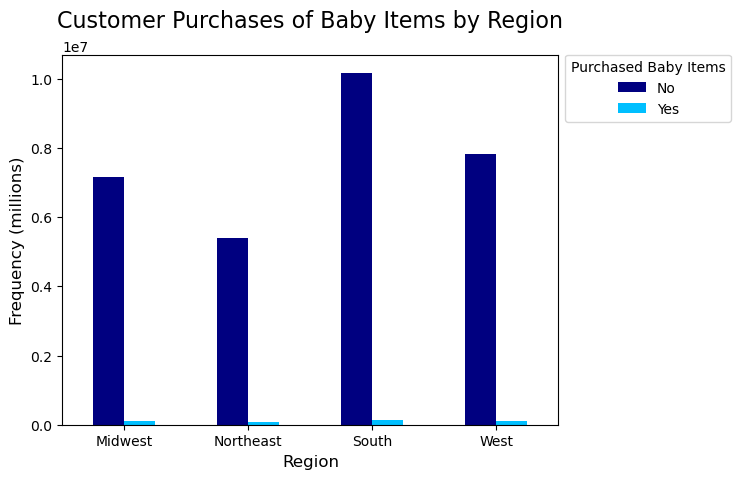

In [127]:
#  Plot baby items purchased by region

bar_ct_baby_region = ct_baby_region.plot(kind = 'bar', rot = 0, stacked=False, color= ['navy', 'deepskyblue'])
plt.title('Customer Purchases of Baby Items by Region', fontsize = 16, pad=20)
bar_ct_baby_region.legend(title='Purchased Baby Items', bbox_to_anchor=(1, 1.02), loc='upper left')
plt.ylabel('Frequency (millions)', fontsize = 12)
plt.xlabel('Region',  fontsize = 12)


bar_ct_baby_region

In [128]:
# Compare baby category across regions(Normalized)

ct_baby_region_norm = pd.crosstab(customers['region'], customers['have_baby'], dropna = False, normalize='index')
ct_baby_region_norm

have_baby,No,Yes
region,,
Midwest,0.986815,0.013185
Northeast,0.986694,0.013306
South,0.986470,0.013530
West,0.987079,0.012921


<AxesSubplot:title={'center':'Percentage of Customers who Purchased Baby Items by Region'}, xlabel='Region', ylabel='Percentage'>

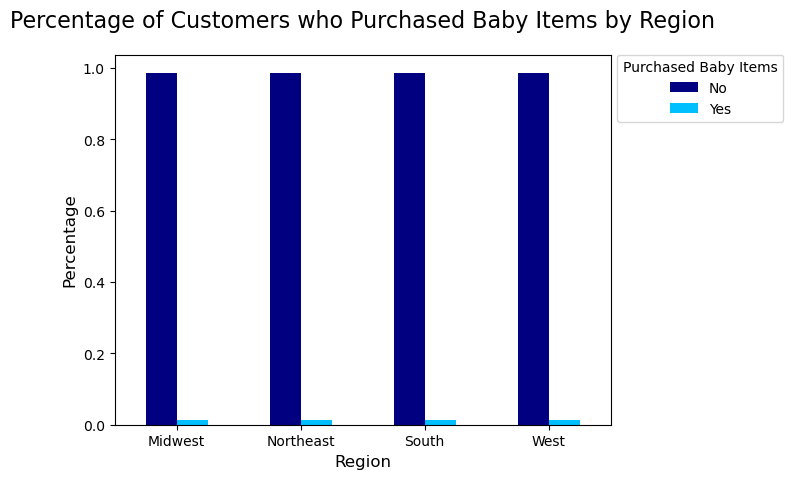

In [129]:
#  Plot baby items purchased by region (normalized)

bar_ct_baby_region_norm = ct_baby_region_norm.plot(kind = 'bar', rot = 0, stacked=False, color= ['navy', 'deepskyblue'])
plt.title('Percentage of Customers who Purchased Baby Items by Region', fontsize = 16, pad=20)
bar_ct_baby_region_norm.legend(title='Purchased Baby Items', bbox_to_anchor=(1, 1.02), loc='upper left')
plt.ylabel('Percentage', fontsize = 12)
plt.xlabel('Region',  fontsize = 12)


bar_ct_baby_region_norm

OBSERVATION: The south region has the most customers that purchased baby related items. The percentage of customers who purchased baby related items is consistently approx. 1.3% across all four regions.

###  Comparing the pets category across regions

In [130]:
# Compare pets category across regions

ct_pets_region = pd.crosstab(customers['region'], customers['have_pet'], dropna = False)
ct_pets_region

have_pet,No,Yes
region,,
Midwest,7240155,21358
Northeast,5446951,17734
South,10281230,29909
West,7903168,24059


<AxesSubplot:title={'center':'Customer Purchases of Pet Items by Region'}, xlabel='Region', ylabel='Frequency (millions)'>

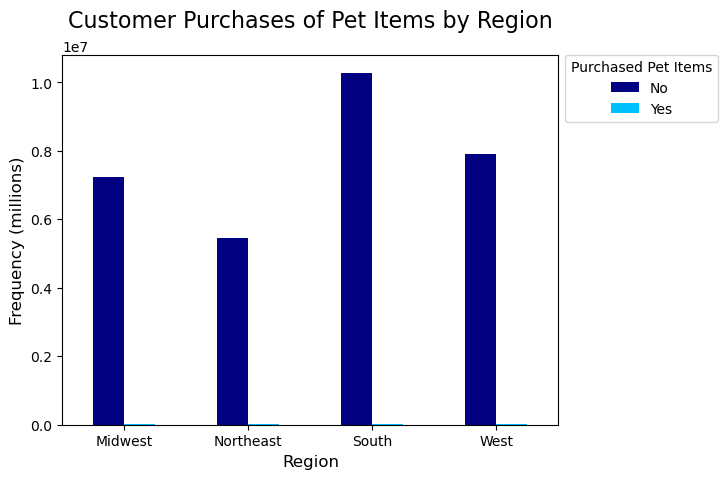

In [131]:
#  Plot pet items purchased by region

bar_ct_pets_region = ct_pets_region.plot(kind = 'bar', rot = 0, stacked=False, color= ['navy', 'deepskyblue'])
plt.title('Customer Purchases of Pet Items by Region', fontsize = 16, pad=20)
bar_ct_pets_region.legend(title='Purchased Pet Items', bbox_to_anchor=(1, 1.02), loc='upper left')
plt.ylabel('Frequency (millions)', fontsize = 12)
plt.xlabel('Region',  fontsize = 12)


bar_ct_pets_region

In [132]:
# Compare pets category across regions (Normalized)

ct_pets_region_norm = pd.crosstab(customers['region'], customers['have_pet'], dropna = False, normalize='index')
ct_pets_region_norm

have_pet,No,Yes
region,,
Midwest,0.997059,0.002941
Northeast,0.996755,0.003245
South,0.997099,0.002901
West,0.996965,0.003035


<AxesSubplot:title={'center':'Percentage of Customers who Purchased Pet Items by Region'}, xlabel='Region', ylabel='Percentage'>

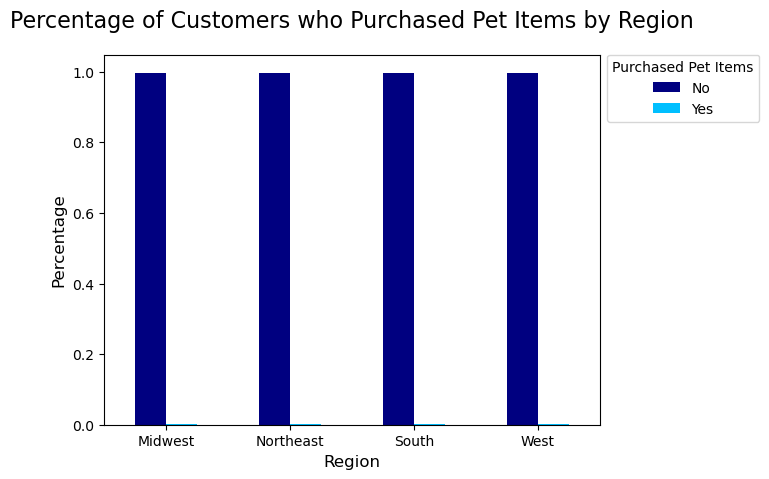

In [133]:
#  Plot pet items purchased by region (normalized)

bar_ct_pets_region_norm = ct_pets_region_norm.plot(kind = 'bar', rot = 0, stacked=False, color= ['navy', 'deepskyblue'])
plt.title('Percentage of Customers who Purchased Pet Items by Region', fontsize = 16, pad=20)
bar_ct_pets_region_norm.legend(title='Purchased Pet Items', bbox_to_anchor=(1, 1.02), loc='upper left')
plt.ylabel('Percentage', fontsize = 12)
plt.xlabel('Region',  fontsize = 12)


bar_ct_pets_region_norm

OBSERVATION:  The south region has the most customers that purchased pet related items. The percentage of customers that purchased pet related items is consistently approx. 0.3% across all four regions.

###  Comparing time of order with region and departments

In [134]:
# Comparing time of order and region

ct_OrderTime_region = pd.crosstab(customers['region'], customers['time_of_order'], dropna = False)
ct_OrderTime_region

time_of_order,Day,Evening,Overnight
region,,,
Midwest,5946148,916105,399260
Northeast,4474489,685550,304646
South,8441434,1296255,573450
West,6511424,981602,434201


<AxesSubplot:title={'center':'Order Time by Region'}, xlabel='Region', ylabel='Number of Orders (millions)'>

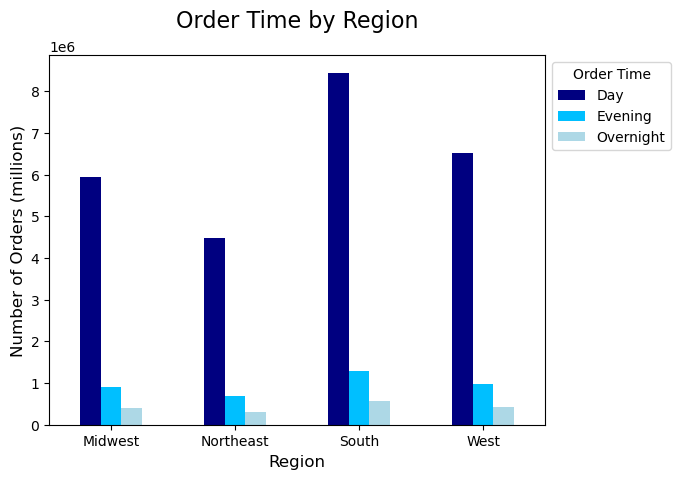

In [135]:
bar_ct_OrderTime_region = ct_OrderTime_region.plot(kind = 'bar', rot = 0, color= ['navy', 'deepskyblue', 'lightblue'])
plt.title('Order Time by Region', fontsize = 16, pad=20)
bar_ct_OrderTime_region.legend(title='Order Time', bbox_to_anchor=(1, 1), loc='upper left')
plt.ylabel('Number of Orders (millions)', fontsize = 12)
plt.xlabel('Region',  fontsize = 12)

bar_ct_OrderTime_region

In [136]:
# Comparing time of order and region (Normalized)

ct_OrderTime_region_norm = pd.crosstab(customers['region'], customers['time_of_order'], dropna = False, normalize='index')
ct_OrderTime_region_norm

time_of_order,Day,Evening,Overnight
region,,,
Midwest,0.818858,0.126159,0.054983
Northeast,0.818801,0.125451,0.055748
South,0.818671,0.125714,0.055615
West,0.821400,0.123827,0.054773


<AxesSubplot:title={'center':'Percentage of Orders per Time Category by Region'}, xlabel='Region', ylabel='Percentage'>

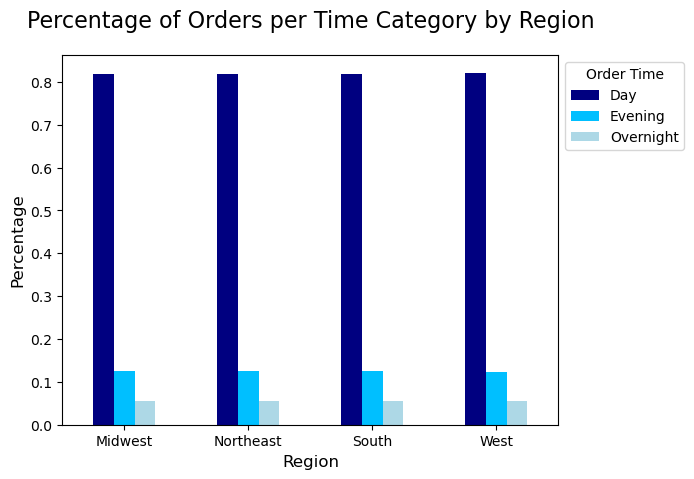

In [137]:
bar_ct_OrderTime_region_norm = ct_OrderTime_region_norm.plot(kind = 'bar', rot = 0, color= ['navy', 'deepskyblue', 'lightblue'])
plt.title('Percentage of Orders per Time Category by Region', fontsize = 16, pad=20)
bar_ct_OrderTime_region_norm.legend(title='Order Time', bbox_to_anchor=(1, 1), loc='upper left')
plt.ylabel('Percentage', fontsize = 12)
plt.xlabel('Region',  fontsize = 12)

bar_ct_OrderTime_region_norm

OBSERVATION:  Most orders are placed during the Day time across all regions followed by Evening and then Overnight/Early Morning. The proportions of the three categories are consistient across all regions, 82% during the day, 12.5% in the evening, and 5.5% overnight.

In [138]:
# Comparing time of order category vs departments (Normalized on rows)

ct_TimeOfOrder_dept_rows = pd.crosstab(customers['department'], customers['time_of_order'], dropna = False, normalize = 'index')
ct_TimeOfOrder_dept_rows

time_of_order,Day,Evening,Overnight
department,,,
alcohol,0.883445,0.086948,0.029607
babies,0.785715,0.148034,0.066251
bakery,0.823996,0.119987,0.056017
beverages,0.831724,0.115018,0.053258
breakfast,0.816111,0.125840,0.058049
bulk,0.811904,0.134764,0.053332
canned goods,0.823526,0.123761,0.052714
dairy eggs,0.818149,0.125057,0.056795
deli,0.824596,0.122563,0.052841


In [139]:
# Comparing time of order category vs departments (Normalized on columns)

ct_TimeOfOrder_dept_col = pd.crosstab(customers['department'], customers['time_of_order'], dropna = False, normalize = 'columns')
ct_TimeOfOrder_dept_col

time_of_order,Day,Evening,Overnight
department,,,
alcohol,0.005036,0.003241,0.002502
babies,0.012708,0.015660,0.015886
bakery,0.036399,0.034665,0.036683
beverages,0.084305,0.076250,0.080029
breakfast,0.021577,0.021760,0.022752
bulk,0.001070,0.001162,0.001042
canned goods,0.032848,0.032286,0.031170
dairy eggs,0.166934,0.166887,0.171794
deli,0.032623,0.031714,0.030992


OBSERVATION:  Alcohol stands out as having the highest percentage of orders placed during the day and the fewest during Evenings and Overnight. The babies department has the fewest percentage of orders placed during the day and the most in the Evenings and Overnight.

<AxesSubplot:title={'center':'Order Time Categories by Department'}, xlabel='Department', ylabel='Proportion (%)'>

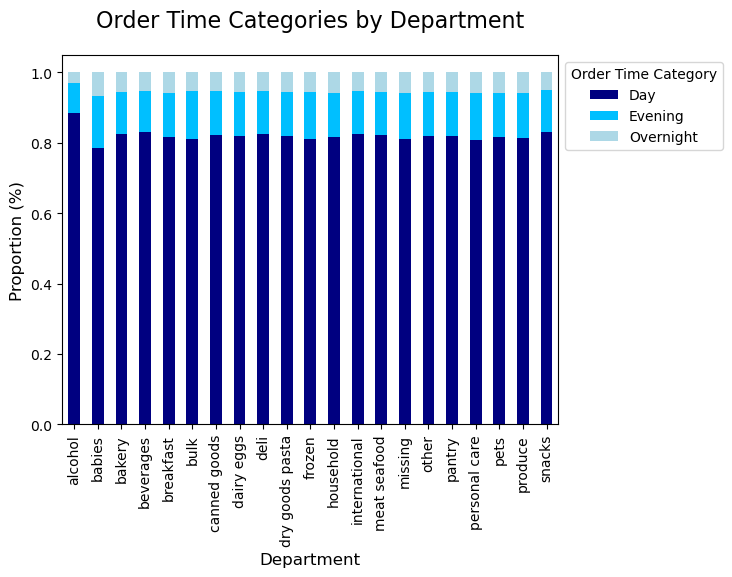

In [140]:
# Stacked Bar Chart of order category vs departments (Normalized on departments (rows))

bar_ct_TimeOfOrder_dept_norm_rows = ct_TimeOfOrder_dept_rows.plot(kind = 'bar', stacked = True, color= ['navy', 'deepskyblue', 'lightblue'])
bar_ct_TimeOfOrder_dept_norm_rows.legend(title='Order Time Category', bbox_to_anchor=(1, 1), loc='upper left')
plt.title('Order Time Categories by Department', fontsize = 16, pad=20)

plt.ylabel('Proportion (%)', fontsize = 12)
plt.xlabel('Department',  fontsize = 12)

bar_ct_TimeOfOrder_dept_norm_rows

In [141]:
# Comparing age category vs. orders day of wewek (Normalized)

ct_OrderDay_age = pd.crosstab(customers['age_category'], customers['orders_day_of_week'], dropna = False, normalize = 'index')
ct_OrderDay_age

orders_day_of_week,0,1,2,3,4,5,6
age_category,,,,,,,
Senior_60+,0.190620,0.173470,0.129982,0.119266,0.116920,0.130500,0.139243
adult_25-40,0.191842,0.176757,0.128892,0.118180,0.117952,0.129878,0.136500
adult_40-60,0.190390,0.174353,0.130983,0.118083,0.116758,0.129870,0.139562
young_adult_18-25,0.190478,0.175768,0.129408,0.118064,0.116544,0.131523,0.138215


<AxesSubplot:title={'center':'Age Category vs. Order Day of Week'}, xlabel='Age Category', ylabel='Percentage'>

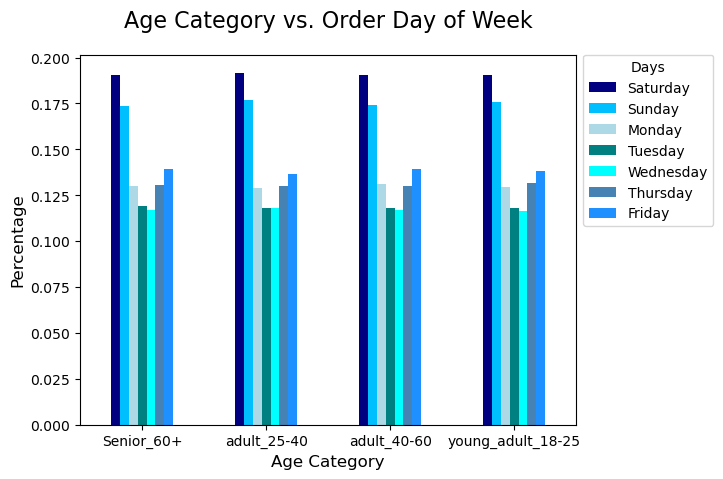

In [142]:
# Bar chart age category vs. orders day of wewek

bar_ct_OrderDay_age = ct_OrderDay_age.plot(kind = 'bar', rot = 0, color= ['navy', 'deepskyblue', 'lightblue', 'teal', 'cyan','steelblue', 'dodgerblue'])
bar_ct_OrderDay_age.legend(title='Days', bbox_to_anchor=(1, 1.02), loc='upper left', labels=['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])
plt.title('Age Category vs. Order Day of Week', fontsize = 16, pad=20)
plt.ylabel('Percentage', fontsize = 12)
plt.xlabel('Age Category',  fontsize = 12)

bar_ct_OrderDay_age

OBSERVATION: Across all age categories, Saturday is consistiently the day with the most orders with just over 19%. Wednesday and Tuesday are the days with the fewest orders with just under 12% for both days

##  9. Produce suitable charts to illustrate your results and export them in your project folder.

In [143]:
bar_have_pet_days_since_prior_mean.figure.savefig(os.path.join(path_vis, 'bar_have_pet_days_since_prior_mean.png'), \
                                                  bbox_inches = 'tight')

In [144]:
bar_have_baby_prices_mean.figure.savefig(os.path.join(path_vis, 'bar_have_baby_prices_mean.png'), bbox_inches = 'tight')

In [147]:
bar_have_baby_days_since_prior_mean.figure.savefig(os.path.join(path_vis, 'bar_have_baby_days_since_prior_mean.png'), \
                                                   bbox_inches = 'tight')

In [148]:
bar_income_category_prices_mean.figure.savefig(os.path.join(path_vis, 'bar_income_category_prices_mean.png'), bbox_inches = \
                                                  'tight')

In [149]:
bar_income_cat_days_since_prior_mean.figure.savefig(os.path.join(path_vis, 'bar_income_cat_days_since_prior_mean.png'), \
                                                    bbox_inches = 'tight')

In [150]:
bar_alcohol_prices_mean.figure.savefig(os.path.join(path_vis, 'bar_alcohol_prices_mean.png'), bbox_inches = 'tight')

In [151]:
bar_alcohol_prior_order_mean.figure.savefig(os.path.join(path_vis, 'bar_alcohol_prior_order_mean.png'), bbox_inches = 'tight')

In [152]:
bar_ct_alcohol_region.figure.savefig(os.path.join(path_vis, 'bar_ct_alcohol_region.png'), bbox_inches = 'tight')

In [153]:
bar_ct_alcohol_region_norm.figure.savefig(os.path.join(path_vis, 'bar_ct_alcohol_region_norm.png'), bbox_inches = 'tight')

In [154]:
bar_ct_baby_region.figure.savefig(os.path.join(path_vis, 'bar_ct_baby_region.png'), bbox_inches = 'tight')

In [155]:
bar_ct_baby_region_norm.figure.savefig(os.path.join(path_vis, 'bar_ct_baby_region_norm.png'), bbox_inches = 'tight')

In [156]:
bar_ct_pets_region.figure.savefig(os.path.join(path_vis, 'bar_ct_pets_region.png'), bbox_inches = 'tight')

In [157]:
bar_ct_pets_region_norm.figure.savefig(os.path.join(path_vis, 'bar_ct_pets_region_norm.png'), bbox_inches = 'tight')

In [158]:
bar_ct_OrderTime_region.figure.savefig(os.path.join(path_vis, 'bar_ct_OrderTime_region.png'), bbox_inches = 'tight')

In [159]:
bar_ct_OrderTime_region_norm.figure.savefig(os.path.join(path_vis, 'bar_ct_OrderTime_region_norm.png'), bbox_inches = 'tight')

In [160]:
bar_loyalty_order_freq.figure.savefig(os.path.join(path_vis, 'bar_loyalty_order_freq.png'), bbox_inches = 'tight')

In [161]:
bar_ct_loyalty_order_freq_norm.figure.savefig(os.path.join(path_vis, 'bar_ct_loyalty_order_freq_norm.png'), bbox_inches = \
                                                        'tight')

In [162]:
order_freq_by_dept_barh.figure.savefig(os.path.join(path_vis, 'order_freq_by_dept_barh.png'), bbox_inches = 'tight')

In [163]:
price_range_cat_bar.figure.savefig(os.path.join(path_vis, 'price_range_cat_bar.png'), bbox_inches = 'tight')

In [164]:
df_day_order_placed_barh.figure.savefig(os.path.join(path_vis, 'df_day_order_placed_barh.png'), bbox_inches = 'tight')

In [165]:
hour_order_placed_bar.figure.savefig(os.path.join(path_vis, 'hour_order_placed_bar.png'), bbox_inches = 'tight')

In [166]:
time_of_order_cat_barh.figure.savefig(os.path.join(path_vis, 'time_of_order_cat_barh.png'), bbox_inches = 'tight')

In [167]:
alcohol_purchase_pie.figure.savefig(os.path.join(path_vis, 'alcohol_purchase_pie.png'), bbox_inches = 'tight')

In [168]:
have_baby_pie.figure.savefig(os.path.join(path_vis, 'have_baby_pie.png'), bbox_inches = 'tight')

In [169]:
have_pet_pie.figure.savefig(os.path.join(path_vis, 'have_pet_pie.png'), bbox_inches = 'tight')

In [170]:
dependents_category_pie.figure.savefig(os.path.join(path_vis, 'dependents_category_pie.png'), bbox_inches = 'tight')

In [171]:
income_category_pie.figure.savefig(os.path.join(path_vis, 'income_category_pie.png'), bbox_inches = 'tight')

In [172]:
age_category_pie.figure.savefig(os.path.join(path_vis, 'age_category_pie.png'), bbox_inches = 'tight')

In [173]:
bar_ct_loyalty_region.figure.savefig(os.path.join(path_vis, 'bar_ct_loyalty_region.png'), bbox_inches = 'tight')

In [174]:
bar_ct_income_region.figure.savefig(os.path.join(path_vis, 'bar_ct_income_region.png'), bbox_inches = 'tight')

In [175]:
bar_ct_dependents_region.figure.savefig(os.path.join(path_vis, 'bar_ct_dependents_region.png'), bbox_inches = 'tight')

In [176]:
bar_ct_OrderTime_region.figure.savefig(os.path.join(path_vis, 'bar_ct_OrderTime_region.png'), bbox_inches = 'tight')

In [177]:
bar_ct_TimeOfOrder_dept_norm_rows.figure.savefig(os.path.join(path_vis, 'bar_ct_TimeOfOrder_dept_norm_rows.png'), \
                                                    bbox_inches = 'tight')

In [178]:
bar_ct_OrderDay_age.figure.savefig(os.path.join(path_vis, 'bar_ct_OrderDay_age.png'), bbox_inches = 'tight')

In [179]:
instacart_customers.to_pickle(os.path.join(path_prep, 'instacart_customers_4-10.pkl'))